<img src="https://github.com/josefgulyas/ffhs/blob/master/FFHS_logo.png?raw=true" height="110" width="160" align="left"/>

<h1 align="center">Semester-Arbeit StatDa</h1>
<h2 align="center">Data-Warehouse-Jobs Ladezeiten</h2>
<h3 align="center">Autor: Josef Gulyas, StatDa, Statistische Datenanalyse</h3>
<h4 align="center">19.06.2020</h4>

# Inhaltsverzeichnis
   
   ### 1. Einführung
   #### 1.1 Aufgabenstellung
   ### 2. Daten Import
   #### 2.1 Beschreibung Datensatz
   ### 3. Deskriptive Statistik
   #### 3.1 Absolute Häufigkeit
   #### 3.1.1 Absolute Häufigkeit aller Tabellen
   #### 3.1.2 Absolute Häufigkeit pro Tabelle
   #### 3.1.3 Fazit zu Absolute Häufigkeiten
   #### 3.2 Lageparameter/Streuungsparameter
   #### 3.2.1 Lageparameter/Streuungsparameter der 6 Tabellen
   #### 3.2.2 Fazit Lageparameter/Streuungsparameter
   #### 3.3 Streudiagramm der 6 Tabellen
   #### 3.3.1 Fazit Streudiagramm der 6 Tabellen
   #### 3.4 Histogramm der Häufigkeiten
   #### 3.4.1 Histogramm der Häufigkeiten ohne Aussreisser
   #### 3.5 Fazit zur deskriptiven Statistik
   ### 4. Statistische Modellbildung und Regressionsanalyse
   #### 4.1 Lineare Regression
   #### 4.1.1 Berechnen der Linearen Regression
   #### 4.1.2 Grafiken zur Linearen Regression
   #### 4.1.3 Fazit zur Linearen Regression
   #### 4.2 Residuenanalyse der Tabelle 'FA_AGG_SCCM_OVERVIEW'
   #### 4.2.1 Fazit zur Residuenanalyse
   #### 4.3 Logistische Regression
   #### 4.3.1 Fazit zur Logistischen Regression
   ### 5. Schätzen
   #### 5.1 Berechnen des wahren Mittelwertes
   #### 5.1.1 Fazit zum wahren Mittelwert bei 99.5%
   #### 5.1.2 Fazit zum wahren Mittelwert bei 95%
   ### 6. Prüfen der Daten auf Normalverteilung
   #### 6.1 Daten der Normalverteilung
   #### 6.2 Histogamme zur Normalverteilung 
   #### 6.3 Q-Q Plot der Normalverteilung
   #### 6.4 Tests der Normalverteilung
   #### 6.5 Fazit der Normalverteilung
   ### 7. Hypothesen
   #### 7.1 Definition der Hypothesen
   #### 7.2 Test zu Hypothese 1
   #### 7.3 Fazit zu Hypothese 1
   #### 7.4 Test zu Hypothese 2
   #### 7.5 Fazit zu Hypothese 2
   ### 8. Zeitreihenanalyse
   #### 8.1 Daten der Zeitreihenanalyse
   #### 8.2 Zeitreihenanalyse mit ARIMA, ETS & STL
   #### 8.3 Zeitreihenanalyse mit Decompose
   #### 8.3.1 Fazit Decompose
   #### 8.4 Forecast mit ARIMA
   #### 8.4.1 Fazit Forecast ARIMA
   #### 8.5 Forecast mit ETS
   #### 8.5.1 Fazit Forecast ETS
   #### 8.6 Forecast mit STL
   #### 8.6.1 Fazit Forecast STL

### 1. Einführung

SRTechnics betreibt seit Jahren ein eigenes Data Warehouse mit SAS. Der Aufbau ist Klassisch. 
####  - Es besteht aus folgenden Layern:
- Stage Layer: Daten werden in Tabellenform aus diversen Quellsystemen, wie SAP, ORACLE, SQL-DB, MSACCESS MSEXCEL etc. via ETL Prozesse ins Data Warehouse geladen.

- Warehouse Layer: Die Daten werden aggregiert und in Fakten, Dimensionen aufgebaut. Auch hier kommen ETL Prozesse zum Einsatz. Der Warehouse Layer ist nach dem Prinzip Star-Schema aufgebaut.

- Datamart Layer: Die Daten werden nach Business Logiken und Themen zusammengestellt, welche dann von allen Business Analysten benutzt werden können.

- Report Layer: Mittels QlikView werden die erstellten Reports den Endbenutzern zur Verfügung gestellt.

<img src="https://github.com/josefgulyas/ffhs/blob/master/ETL.jpg?raw=true" width="30%" height="30%" align="left"/>


#### 1.1 Aufgabenstellung

Da es immer wieder zu Schwankungen der Ladezeiten kommt, sollte dieses Problem mal genauer Untersucht werden.

In [12]:
# Laden der Libraries.
library(haven)
library(ggplot2)
library(dplyr)
library(repr)
library(gridExtra)
library(data.table)
library(xts)
library(ggfortify)
library(forecast)
library(ggseas)
library(tseries)
library(nortest)

### 2. Daten Import

In [13]:
if (Sys.info()['sysname'] == 'Darwin'){
    # Load SAS Table OSX!
    whtbl_loads <- read_sas("/Users/josefgulyas/Documents/FFHS/data/SASJobLoads/whtable_stat.sas7bdat", NULL)
} else if (Sys.info()['sysname'] == 'Linux'){
    #Load SAS Table LINUX!
    whtbl_loads <- read_sas("/mnt/Gulyas/Büro/IT/Python/data/SASJobLoads/whtable_stat.sas7bdat", NULL)
} else {
    # Load SAS Table WINTEL!
    whtbl_loads <- read_sas("//global.srtechnics.com/user/HOME/A490513/Documents/My Python Files/data/SASJobLoads/whtable_stat.sas7bdat", NULL)
}


#### 2.1 Beschreibung Datensatz - Warehouse Tabellen mit Ladezeiten (2015 - 2020)
      
Im erten Teil dieser Arbeit werden die Daten angeschaut und Erläutert.
Die Tabelle beinhaltet die Ladezeiten für den Warehouse Layer(Fakten & Dimensionen) pro Tabelle und ETL-Job, für den Zeitraum 2015 - 2020.

#### Beschreibung der einzelnen Felder aus der Tabelle: WHTABLE_LOADS
##### - Datenquelle: SAS Data Warehouse der Firma SRTechnics Switzerland AG

<table style="border:1px solid black" width="100%" align="left">
    <tr style="border:1px solid black">
        <th style="text-align:center">Feldname:</th>
        <th style="text-align:center">Format:</th>
        <th style="text-align:center">Beschreibung:</th>
    </tr>
    <tr>
        <td style="text-align:center">jobname</td>
        <td style="text-align:center">String</td>
        <td style="text-align:center">Job-Name/Bezeichnung</td>
    </tr>
    <tr>
        <td style="text-align:center">table</td>
        <td style="text-align:center">String</td>
        <td style="text-align:center">Tabellen-Name/Bezeichnung</td>
    </tr>
    <tr>
        <td style="text-align:center">ldate</td>
        <td style="text-align:center">Date</td>
        <td style="text-align:center">Lade-Datum</td>
    </tr>
    <tr>
        <td style="text-align:center">zeittot</td>
        <td style="text-align:center">Time</td>
        <td style="text-align:center">Ladezeit im format hh:mm:ss</td>
    </tr>
    <tr>
        <td style="text-align:center">ladezeit</td>
        <td style="text-align:center">Int64</td>
        <td style="text-align:center">Ladezeit in Sekunden</td>
    </tr>
</table>


### 3. Deskriptive Statistik

#### Anzahl Datensätze:

In [14]:
nrow(whtbl_loads)

[1] 703397

#### Daten-Auszug der Tabelle 'whtbl_loads':

In [15]:
head(whtbl_loads,2)

jobname,table,ldate,zeittot,ladezeit
<chr>,<chr>,<date>,<drtn>,<dbl>
da_dim_equipment.sas,DA_EQUIPMENT,2015-01-01,00:02:48.75,168.75
da_dim_equipment.sas,DA_EQUIPMENT,2015-01-02,00:02:36.66,156.66


#### 3.1 Absolute Häufigkeit

#### 3.1.1 Absolute Häufigkeit aller Tabellen.

In [16]:
wh_tbl_cnt <- whtbl_loads %>%
                count(table) %>%
                select(table,n)
nrow(wh_tbl_cnt)

[1] 422

#### 3.1.2 Absolute Häufigkeit pro Tabelle

In [17]:
head(wh_tbl_cnt,3)

table,n
<chr>,<int>
D_ACTIVITY_TYPES,1825
D_ACTYPGROUP_ACTYPE_TRANSLATION,1028
D_AIR,1825


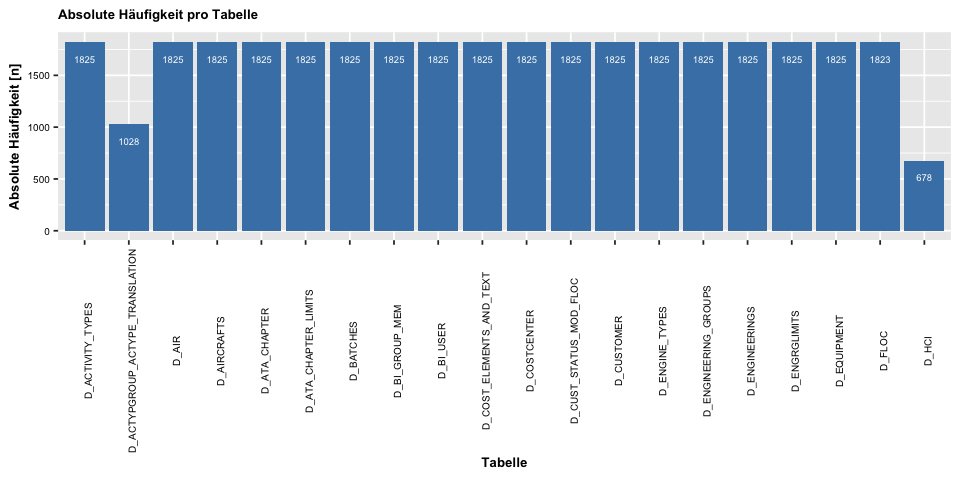

In [18]:
options(repr.plot.width=8, repr.plot.height=4)
plt1 <- ggplot(head(wh_tbl_cnt,20), aes(y=n, x=table)) + 
    geom_bar(stat="identity", fill="steelblue") +
    xlab("Tabelle") + ylab("Absolute Häufigkeit [n]") +
    geom_text(aes(label = n), size = 2, hjust = 0.5, vjust = 3, color="white") +
    ggtitle("Absolute Häufigkeit pro Tabelle") +
    theme(axis.text.x = element_text(color="black", size=6, angle=90),
          axis.text.y = element_text(color="black", size=6, angle=0),
          axis.title = element_text(size=8, face="bold"),
          plot.title = element_text(size=8, face="bold"))

grid.arrange(plt1,
             layout_matrix = rbind(c(1)))

#### 3.1.3 Fazit zu Absolute Häufigkeiten:
- Diverse Tabellen wurden erst zwischen den Jahren 2015 & 2019 erstellt. Darum ist die Anzahl Häufigkeit geringer als bei den Restlichen.

#### 3.2. Lageparameter/Streuungsparameter

In [19]:
tbl_lp_all <- whtbl_loads %>%
                select(table,ladezeit) %>%
                group_by(table) %>%
                summarize(Mittelwert=mean(ladezeit),Min=min(ladezeit),Max=max(ladezeit),Median=median(ladezeit),
                         Standardabweichung=sd(ladezeit),Q25=quantile(ladezeit,probs=0.25),Q50=quantile(ladezeit,probs=0.5),
                         Q75=quantile(ladezeit,probs=0.75))
#head(tbl_lp_all,2)

- Da die Tabelle viele Einträge hat, werden für die Lage/Streungsparameter **6 verschiedene Tabellen** aus der Liste herausgefiltert.'

- Filter: **'DA_EQUIPMENT', 'D_SD_ORDER_BUSINESS', 'D_SHIPMENT_HEADER', 'FA_AGG_SCCM_OVERVIEW','FA_INVENTORY_MOVEMENT', 'FA_MATERIAL_DOCUMENTS'**.

#### 3.2.1 Lageparameter/Streuungsparameter der 6 Tabellen

In [20]:
tbl_lp_6fltr <- whtbl_loads %>%
                select(table, ldate, ladezeit) %>%
                filter(table %in% c("DA_EQUIPMENT","D_SD_ORDER_BUSINESS","D_SHIPMENT_HEADER",
                                    "FA_AGG_SCCM_OVERVIEW","FA_INVENTORY_MOVEMENT","FA_MATERIAL_DOCUMENTS"))

tbl_lp_6sum <- tbl_lp_6fltr %>%
                select(table,ladezeit) %>%
                group_by(table) %>%
                summarize(Mittelwert=mean(ladezeit),Min=min(ladezeit),Max=max(ladezeit),Median=median(ladezeit),
                         Standardabweichung=sd(ladezeit),Q25=quantile(ladezeit,probs=0.25),Q50=quantile(ladezeit,probs=0.5),
                         Q75=quantile(ladezeit,probs=0.75))
head(tbl_lp_6sum)

table,Mittelwert,Min,Max,Median,Standardabweichung,Q25,Q50,Q75
<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
D_SD_ORDER_BUSINESS,1260.5227,319.75,4611.51,1199.42,455.08997,1002.02,1199.42,1454.22
D_SHIPMENT_HEADER,230.1523,78.97,4854.49,227.71,118.33994,203.49,227.71,254.06
DA_EQUIPMENT,163.3185,109.99,1961.13,160.40,51.78206,139.83,160.40,179.55
FA_AGG_SCCM_OVERVIEW,2482.3242,14.72,8436.26,2621.70,1337.70384,1559.89,2621.70,3420.40
FA_INVENTORY_MOVEMENT,984.7090,0.17,4348.74,920.74,383.67607,699.57,920.74,1174.53
FA_MATERIAL_DOCUMENTS,4112.9104,0.07,11116.55,3961.93,1905.08549,2664.61,3961.93,5421.34


#### 3.2.2 Fazit Lageparameter/Streuungsparameter:
- Anhand der Min, Max Werte sieht man, dass die Ladezeiten grosse Schwankungen aufweisen.
- Da die Standardabeichung nicht sehr gross ist, kommen diese extremen Aussreisser nicht allzu oft vor.
- Auch die Q25, Q50 & Q75 Quantile weisen darauf hin, dass die extremen Werte im Verhältnis wenig vorkommen.

#### 3.3 Streudiagramm der 6 Tabellen

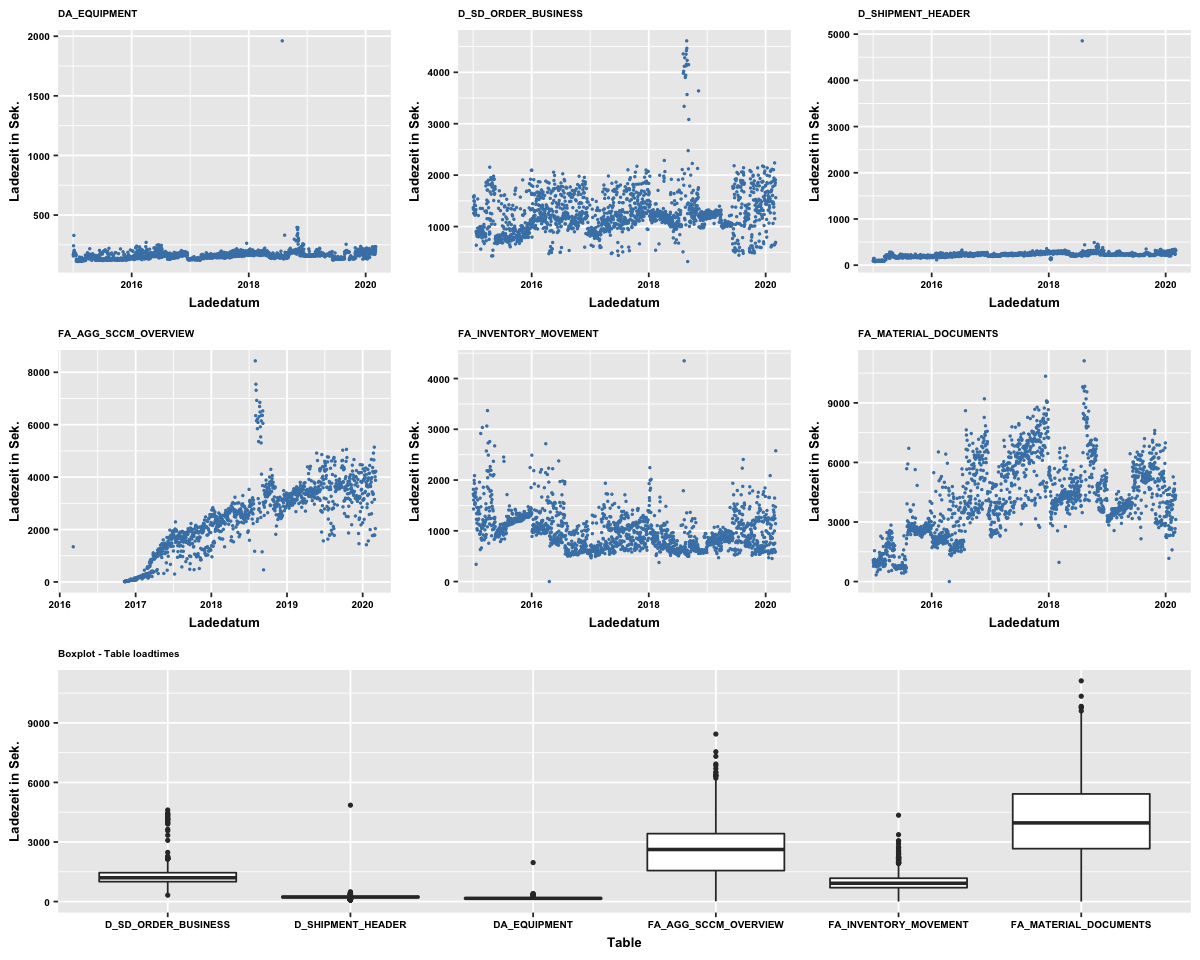

In [21]:
# Einstellen des Plot-Bereichs.
options(repr.plot.width=10, repr.plot.height=8)

plt1 <- ggplot(tbl_lp_6fltr %>% filter(table == "DA_EQUIPMENT"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.3) + 
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle("DA_EQUIPMENT") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face='bold'))

plt2 <- ggplot(tbl_lp_6fltr %>% filter(table == "D_SD_ORDER_BUSINESS"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.3) + 
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle("D_SD_ORDER_BUSINESS") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt3 <- ggplot(tbl_lp_6fltr %>% filter(table == "D_SHIPMENT_HEADER"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.3) + 
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle("D_SHIPMENT_HEADER") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt4 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_AGG_SCCM_OVERVIEW"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.3) + 
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle("FA_AGG_SCCM_OVERVIEW") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt5 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_INVENTORY_MOVEMENT"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.3) + 
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle("FA_INVENTORY_MOVEMENT") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt6 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_MATERIAL_DOCUMENTS"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.3) + 
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle("FA_MATERIAL_DOCUMENTS") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt7 <- ggplot(tbl_lp_6fltr, aes(group=table, y=ladezeit, x=table)) + 
        geom_boxplot(outlier.size=.8) + 
        xlab("Table") + ylab("Ladezeit in Sek.") +
        ggtitle("Boxplot - Table loadtimes") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

grid.arrange(plt1,plt2,plt3,plt4,plt5,plt6,plt7,
             layout_matrix = rbind(c(1,2,3),c(4,5,6),c(7)))

#### 3.3.1 Fazit Streudiagramm der 6 Tabellen:
- So wie es aussieht, haben alle Tabellen grössere Aussreisser in den Ladezeiten. <br>Speziell **mitte 2018** waren die Ladezeiten um ein **Vielfaches höher** als sonst. Dies könnte auf ein **Hardware Fehler oder eine falsche Konfiguration** hinweisen.

#### 3.4 Histogramm der Häufigkeiten

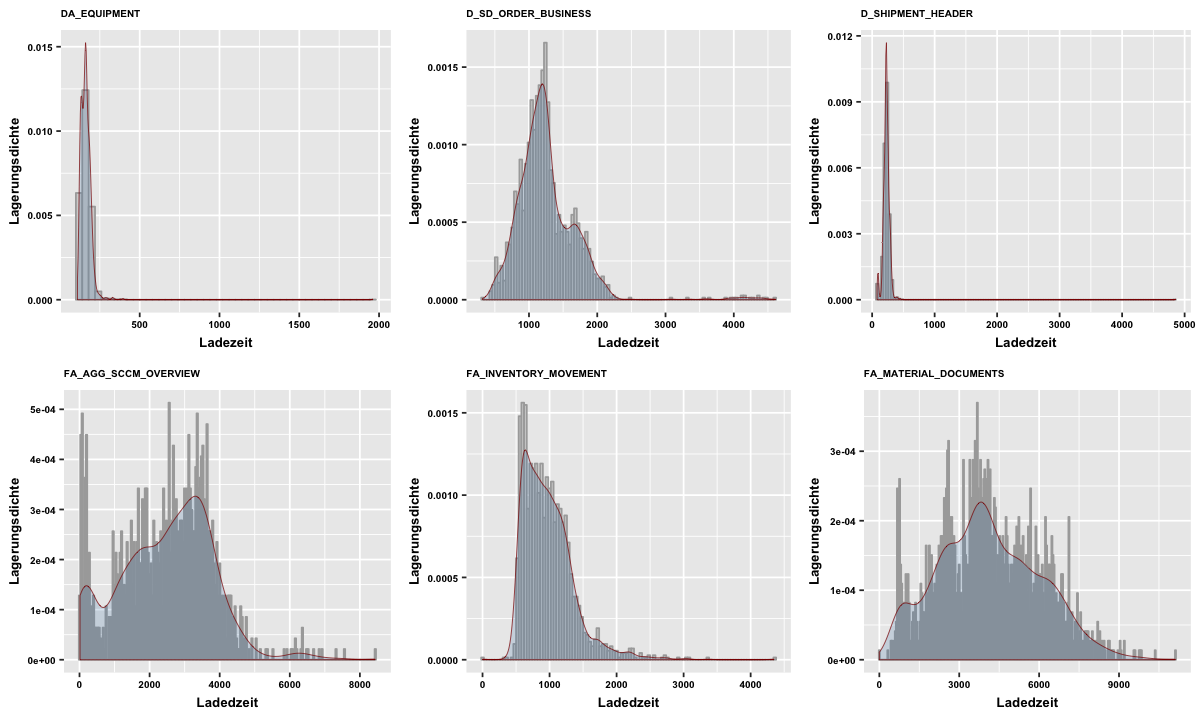

In [22]:
options(repr.plot.width=10, repr.plot.height=6)

plt1 <- ggplot(tbl_lp_6fltr %>% filter(table == "DA_EQUIPMENT"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="darkgrey", fill="lightgray") + 
        geom_density(color='darkred',alpha=.2,fill="steelblue",size=.2) +
        xlab("Ladezeit") + ylab("Lagerungsdichte") +
        ggtitle("DA_EQUIPMENT") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))


plt2 <- ggplot(tbl_lp_6fltr %>% filter(table == "D_SD_ORDER_BUSINESS"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="darkgrey", fill="lightgray") + 
        geom_density(color='darkred',alpha=.2,fill="steelblue",size=.2) +
        xlab("Ladedzeit") + ylab("Lagerungsdichte") +
        ggtitle("D_SD_ORDER_BUSINESS") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt3 <- ggplot(tbl_lp_6fltr %>% filter(table == "D_SHIPMENT_HEADER"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="darkgrey", fill="lightgray") + 
        geom_density(color='darkred',alpha=.2,fill="steelblue",size=.2) +
        xlab("Ladedzeit") + ylab("Lagerungsdichte") +
        ggtitle("D_SHIPMENT_HEADER") +
         theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt4 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_AGG_SCCM_OVERVIEW"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="darkgrey", fill="lightgray") + 
        geom_density(color='darkred',alpha=.2,fill="steelblue",size=.2) +
        xlab("Ladedzeit") + ylab("Lagerungsdichte") +
        ggtitle("FA_AGG_SCCM_OVERVIEW") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt5 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_INVENTORY_MOVEMENT"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="darkgrey", fill="lightgray") + 
        geom_density(color='darkred',alpha=.2,fill="steelblue",size=.2) +
        xlab("Ladedzeit") + ylab("Lagerungsdichte") +
        ggtitle("FA_INVENTORY_MOVEMENT") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt6 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_MATERIAL_DOCUMENTS"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="darkgrey", fill="lightgray") + 
        geom_density(color='darkred',alpha=.2,fill="steelblue",size=.2) +
        xlab("Ladedzeit") + ylab("Lagerungsdichte") +
        ggtitle("FA_MATERIAL_DOCUMENTS") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

grid.arrange(plt1,plt2,plt3,plt4,plt5,plt6,
             layout_matrix = rbind(c(1,2,3),c(4,5,6)))

#### 3.4.1 Histogramm der Häufigkeiten ohne Ausreisser

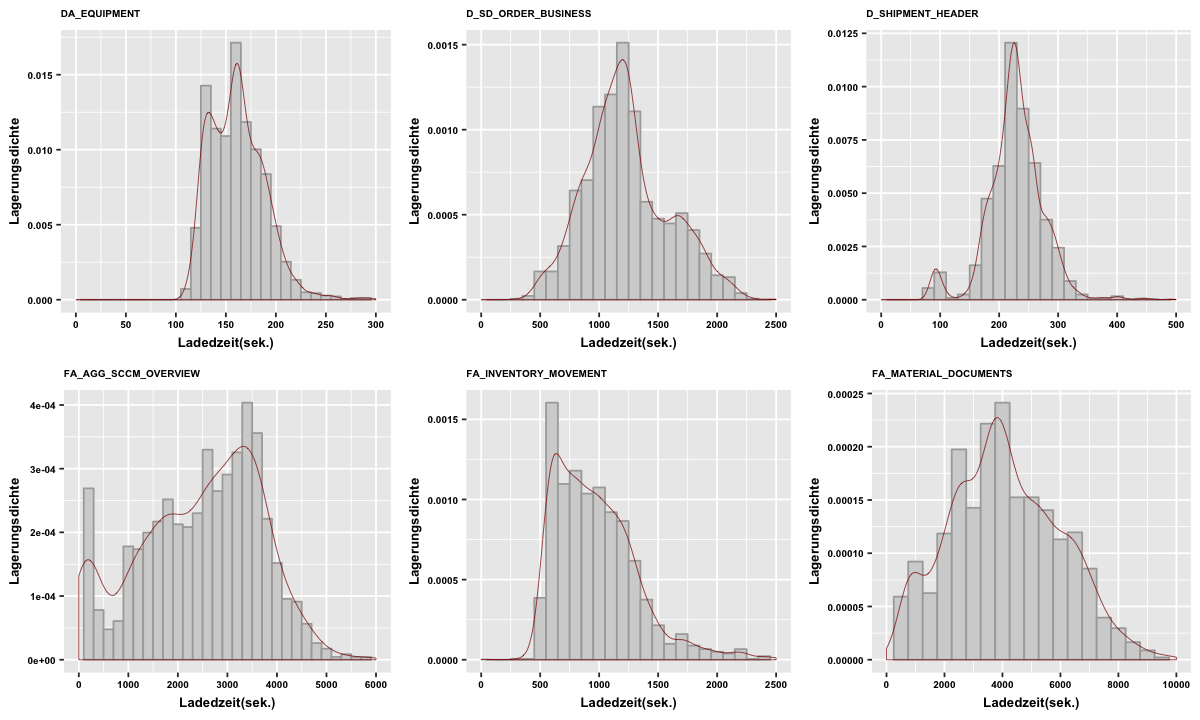

In [23]:
options(repr.plot.width=10, repr.plot.height=6, warn=-1)

plt1 <- ggplot(tbl_lp_6fltr %>% filter(table == "DA_EQUIPMENT"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=10,aes(y=..density..),color="darkgrey", fill="lightgray", na.rm=TRUE) + 
        geom_density(color='darkred',alpha=.2,size=.2) +
        scale_x_continuous(breaks=seq(0,300,50),
                            limits=c(0,300)) +
        xlab("Ladedzeit(sek.)") + ylab("Lagerungsdichte") +
        ggtitle("DA_EQUIPMENT") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))


plt2 <- ggplot(tbl_lp_6fltr %>% filter(table == "D_SD_ORDER_BUSINESS"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=100,aes(y=..density..),color="darkgrey", fill="lightgray", na.rm=TRUE) + 
        geom_density(color='darkred',alpha=.2,size=.2) +
        scale_x_continuous(breaks=seq(0,2500,500),
                            limits=c(0,2500)) +
        xlab("Ladedzeit(sek.)") + ylab("Lagerungsdichte") +
        ggtitle("D_SD_ORDER_BUSINESS") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt3 <- ggplot(tbl_lp_6fltr %>% filter(table == "D_SHIPMENT_HEADER"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=20,aes(y=..density..),color="darkgrey", fill="lightgray", na.rm=TRUE) + 
        geom_density(color='darkred',alpha=.2,size=.2) +
        scale_x_continuous(breaks=seq(0,500,100),
                            limits=c(0,500)) +
        xlab("Ladedzeit(sek.)") + ylab("Lagerungsdichte") +
        ggtitle("D_SHIPMENT_HEADER") +
         theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt4 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_AGG_SCCM_OVERVIEW"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=200,aes(y=..density..),color="darkgrey", fill="lightgray", na.rm=TRUE) + 
        geom_density(color='darkred',alpha=.2,size=.2) +
        scale_x_continuous(breaks=seq(0,6000,1000),
                            limits=c(0,6000)) +
        xlab("Ladedzeit(sek.)") + ylab("Lagerungsdichte") +
        ggtitle("FA_AGG_SCCM_OVERVIEW") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt5 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_INVENTORY_MOVEMENT"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=100,aes(y=..density..),color="darkgrey", fill="lightgray", na.rm=TRUE) + 
        geom_density(color='darkred',alpha=.2,size=.2) +
        scale_x_continuous(breaks=seq(0,2500,500),
                            limits=c(0,2500)) +
        xlab("Ladedzeit(sek.)") + ylab("Lagerungsdichte") +
        ggtitle("FA_INVENTORY_MOVEMENT") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

plt6 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_MATERIAL_DOCUMENTS"), aes(x=ladezeit)) + 
        geom_histogram(binwidth=500,aes(y=..density..),color="darkgrey", fill="lightgray", na.rm=TRUE) + 
        geom_density(color='darkred',alpha=.2,size=.2) +
        scale_x_continuous(breaks=seq(0,10000,2000),
                            limits=c(0,10000)) +
        xlab("Ladedzeit(sek.)") + ylab("Lagerungsdichte") +
        ggtitle("FA_MATERIAL_DOCUMENTS") +
        theme(axis.text.x = element_text(face="bold", color="black", size=6, angle=0),
              axis.text.y = element_text(face="bold", color="black", size=6, angle=0),
              axis.title = element_text(size=8, face="bold"),
              plot.title = element_text(size=6, face="bold"))

grid.arrange(plt1,plt2,plt3,plt4,plt5,plt6,
             layout_matrix = rbind(c(1,2,3),c(4,5,6)))

#### 3.5 Fazit zur deskriptiven Statistik:
- Wenn man die Häufigkeitsverteilung mittels Histogram anschaut, hat es bei allen Ladezeiten diverse Aussreisser. <br>Die Verteilung ist **vorwiegend Rechtssschief**.<br>Das liegt daran, dass im Jahr **2018 ein Datacenter wechsel stattfand**. Die ganzen Server und das Filesystem wurden zuerst **falsch konfiguriert**. Daher kam dieser **signifikante Anstieg der Ladezeiten**.

### 4. Statistische Modellbildung und Regressionsanalyse
#### 4.1 Lineare Regression
#### 4.1.1 Berechnen der Linearen Regression

In [24]:
options(warn=0)
#------------------------------------------------------------------
tbl_lm_1fltr <- whtbl_loads %>%
                select(table, ldate, ladezeit) %>%
                filter(table %in% c("DA_EQUIPMENT"))
lin_model1 <- lm(tbl_lm_1fltr$ladezeit ~ tbl_lm_1fltr$ldate)
#nrow(tbl_lm_1fltr)
#sd(tbl_lm_1fltr$ladezeit)
#summary(lin_model1)
R2 <- round(summary(lin_model1)$r.squared,5)
R2_adjusted <- round(summary(lin_model1)$adj.r.squared,5)
R2_m1 <- data.frame(R2,R2_adjusted)
#head(R2_m1)
Intercept_m1 <- coef(summary(lin_model1))
#head(Intercept_m1)
#Residuals <- resid(lin_model1)
#head(lin_model1$residuals)
#------------------------------------------------------------------
tbl_lm_2fltr <- whtbl_loads %>%
                select(table, ldate, ladezeit) %>%
                filter(table %in% c("D_SD_ORDER_BUSINESS"))
lin_model2 <- lm(tbl_lm_2fltr$ladezeit ~ tbl_lm_2fltr$ldate)
#summary(lin_model2)
R2 <- round(summary(lin_model2)$r.squared,5)
R2_adjusted <- round(summary(lin_model2)$adj.r.squared,5)
R2_m2 <- data.frame(R2,R2_adjusted)
#head(R2_m2)
Intercept_m2 <- coef(summary(lin_model2))
#head(Intercept_m2)
#------------------------------------------------------------------
tbl_lm_3fltr <- whtbl_loads %>%
                select(table, ldate, ladezeit) %>%
                filter(table %in% c("D_SHIPMENT_HEADER"))
lin_model3 <- lm(tbl_lm_3fltr$ladezeit ~ tbl_lm_3fltr$ldate)
#summary(lin_model3)
R2 <- round(summary(lin_model3)$r.squared,5)
R2_adjusted <- round(summary(lin_model3)$adj.r.squared,5)
R2_m3 <- data.frame(R2,R2_adjusted)
#head(R2_m3)
Intercept_m3 <- coef(summary(lin_model3))
#head(Intercept_m3)
#------------------------------------------------------------------
tbl_lm_4fltr <- whtbl_loads %>%
                select(table, ldate, ladezeit) %>%
                filter(table %in% c("FA_AGG_SCCM_OVERVIEW"))
lin_model4 <- lm(tbl_lm_4fltr$ladezeit ~ tbl_lm_4fltr$ldate)
#summary(lin_model4)
R2 <- round(summary(lin_model4)$r.squared,5)
R2_adjusted <- round(summary(lin_model4)$adj.r.squared,5)
R2_m4 <- data.frame(R2,R2_adjusted)
#head(R2_m4)
Intercept_m4 <- coef(summary(lin_model4))
#head(Intercept_m4)
#------------------------------------------------------------------
tbl_lm_5fltr <- whtbl_loads %>%
                select(table, ldate, ladezeit) %>%
                filter(table %in% c("FA_INVENTORY_MOVEMENT"))
lin_model5 <- lm(tbl_lm_5fltr$ladezeit ~ tbl_lm_5fltr$ldate)
#summary(lin_model5)
R2 <- round(summary(lin_model5)$r.squared,5)
R2_adjusted <- round(summary(lin_model5)$adj.r.squared,5)
R2_m5 <- data.frame(R2,R2_adjusted)
#head(R2_m5)
Intercept_m5 <- coef(summary(lin_model5))
#head(Intercept_m5)
#------------------------------------------------------------------
tbl_lm_6fltr <- whtbl_loads %>%
                select(table, ldate, ladezeit) %>%
                filter(table %in% c("FA_MATERIAL_DOCUMENTS"))
lin_model6 <- lm(tbl_lm_6fltr$ladezeit ~ tbl_lm_6fltr$ldate)
#summary(lin_model6)
R2 <- round(summary(lin_model6)$r.squared,5)
R2_adjusted <- round(summary(lin_model6)$adj.r.squared,5)
R2_m6 <- data.frame(R2,R2_adjusted)
#head(R2_m6)
Intercept_m6 <- coef(summary(lin_model6))
#head(Intercept_m6)
#------------------------------------------------------------------

#### 4.1.2 Grafiken zur Linearen Regression

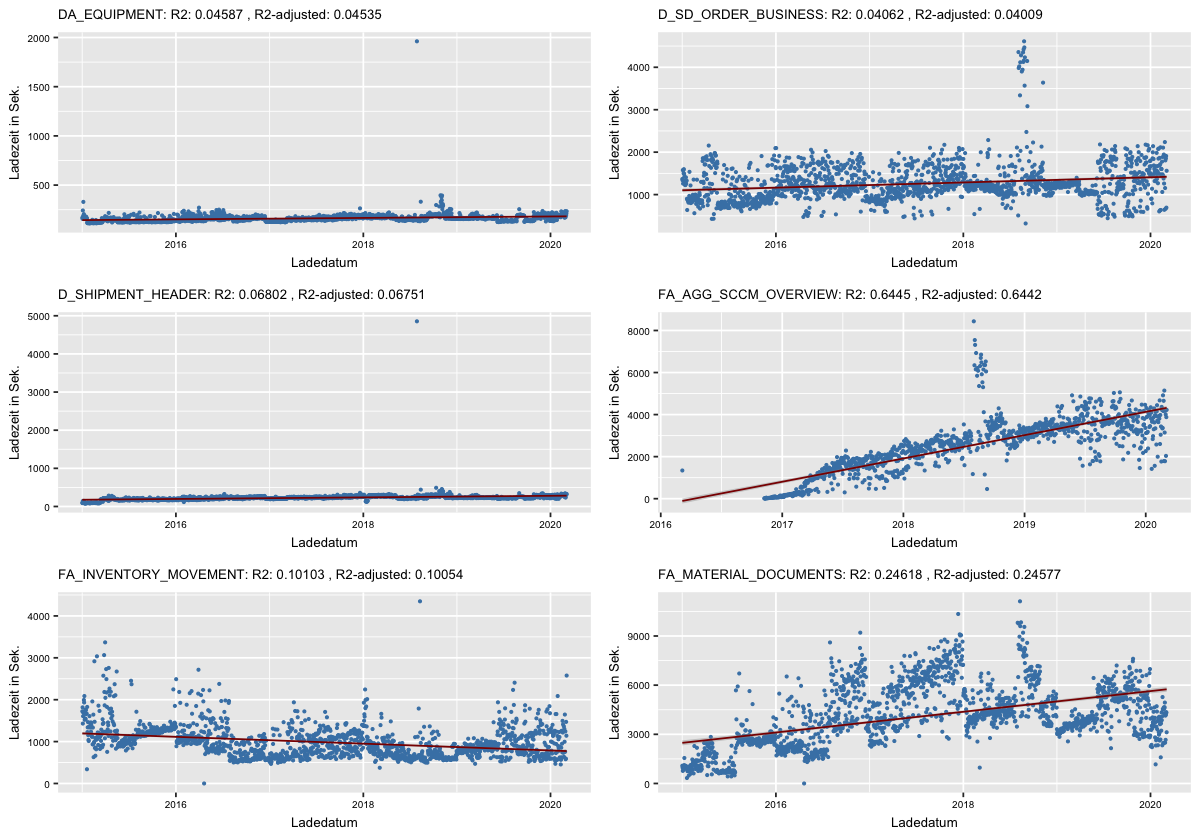

In [25]:
options(repr.plot.width=10, repr.plot.height=7)

plt1 <- ggplot(tbl_lp_6fltr %>% filter(table == "DA_EQUIPMENT"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.5) +
        geom_smooth(color='darkred', method=lm, size=.5) +
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle(paste("DA_EQUIPMENT: R2:",as.character(R2_m1$"R2"),", R2-adjusted:",as.character(R2_m1$"R2_adjusted"))) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt2 <- ggplot(tbl_lp_6fltr %>% filter(table == "D_SD_ORDER_BUSINESS"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.5) + 
        geom_smooth(color='darkred', method=lm, size=.5) +
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle(paste("D_SD_ORDER_BUSINESS: R2:",as.character(R2_m2$"R2"),", R2-adjusted:",as.character(R2_m2$"R2_adjusted"))) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt3 <- ggplot(tbl_lp_6fltr %>% filter(table == "D_SHIPMENT_HEADER"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.5) +
        geom_smooth(color='darkred', method=lm, size=.5) +
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle(paste("D_SHIPMENT_HEADER: R2:",as.character(R2_m3$"R2"),", R2-adjusted:",as.character(R2_m3$"R2_adjusted"))) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt4 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_AGG_SCCM_OVERVIEW"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.5) +
        geom_smooth(color='darkred', method=lm, size=.5) +
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle(paste("FA_AGG_SCCM_OVERVIEW: R2:",as.character(R2_m4$"R2"),", R2-adjusted:",as.character(R2_m4$"R2_adjusted"))) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt5 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_INVENTORY_MOVEMENT"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.5) + 
        geom_smooth(color='darkred', method=lm, size=.5) +
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle(paste("FA_INVENTORY_MOVEMENT: R2:",as.character(R2_m5$"R2"),", R2-adjusted:",as.character(R2_m5$"R2_adjusted"))) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt6 <- ggplot(tbl_lp_6fltr %>% filter(table == "FA_MATERIAL_DOCUMENTS"), aes(y=ladezeit, x=ldate)) + 
        geom_point(color="steelblue", size=.5) + 
        geom_smooth(color='darkred', method=lm, size=.5) +
        xlab("Ladedatum") + ylab("Ladezeit in Sek.") +
        ggtitle(paste("FA_MATERIAL_DOCUMENTS: R2:",as.character(R2_m6$"R2"),", R2-adjusted:",as.character(R2_m6$"R2_adjusted"))) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

grid.arrange(plt1,plt2,plt3,plt4,plt5,plt6,
             layout_matrix = rbind(c(1,2),c(3,4),c(5,6)))

#### 4.1.3 Fazit zur Linearen Regression:
- Bei der Tabelle 'FA_AGG_SCCM_OVERVIEW' ist der R2-Wert(Bestimmtheitsmass) mit <b>0.6445 oder 64.45%</b> am höchsten.
- Es kann also nur bedingt mit einer 64.45% Wahrscheinlichkeit vorhergesagt werden wie die Ladezeiten sich anhand des Ladedatums entwickeln werden. <br>Tendenziell ist davon auszugehen, dass sich die Ladezeiten in Zukunft bei den **meisten Tabellen vergrössern werden**.

#### 4.2 Residuenanalyse der Tabelle 'FA_AGG_SCCM_OVERVIEW'


Call:
lm(formula = tbl_lm_1fltr$ladezeit ~ tbl_lm_1fltr$ldate)

Residuals:
    Min      1Q  Median      3Q     Max 
 -53.60  -19.83   -5.42   13.49 1790.49 

Coefficients:
                     Estimate Std. Error t value Pr(>|t|)    
(Intercept)        -1.893e+02  3.769e+01  -5.024 5.57e-07 ***
tbl_lm_1fltr$ldate  2.029e-02  2.167e-03   9.362  < 2e-16 ***
---
Signif. codes:  0 ‘***’ 0.001 ‘**’ 0.01 ‘*’ 0.05 ‘.’ 0.1 ‘ ’ 1

Residual standard error: 50.59 on 1823 degrees of freedom
Multiple R-squared:  0.04587,	Adjusted R-squared:  0.04535 
F-statistic: 87.64 on 1 and 1823 DF,  p-value: < 2.2e-16


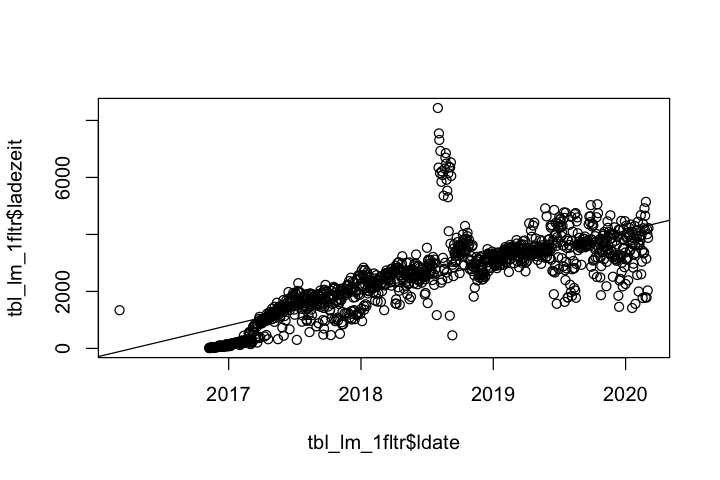

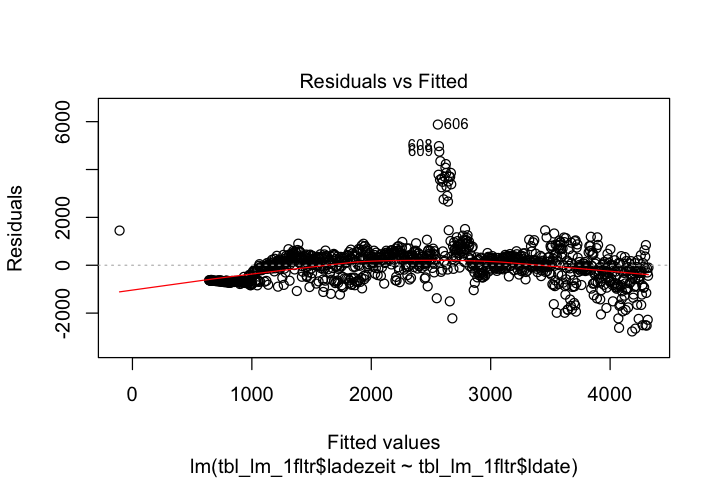

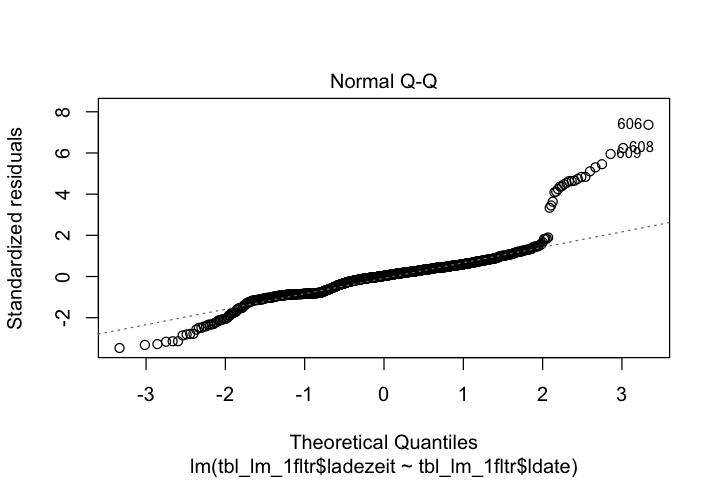

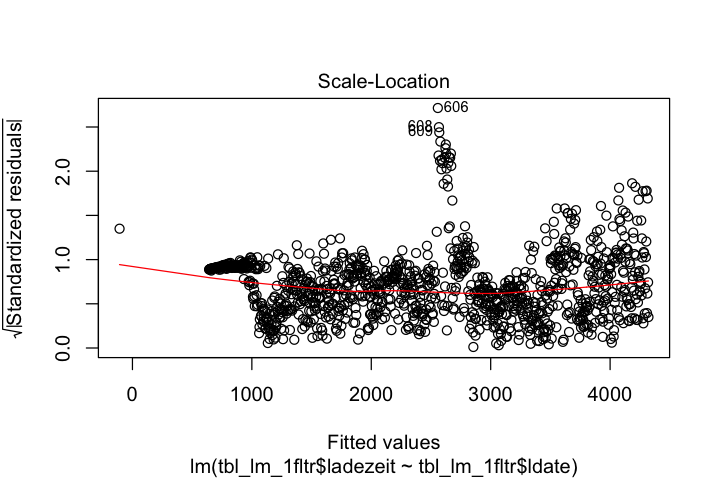

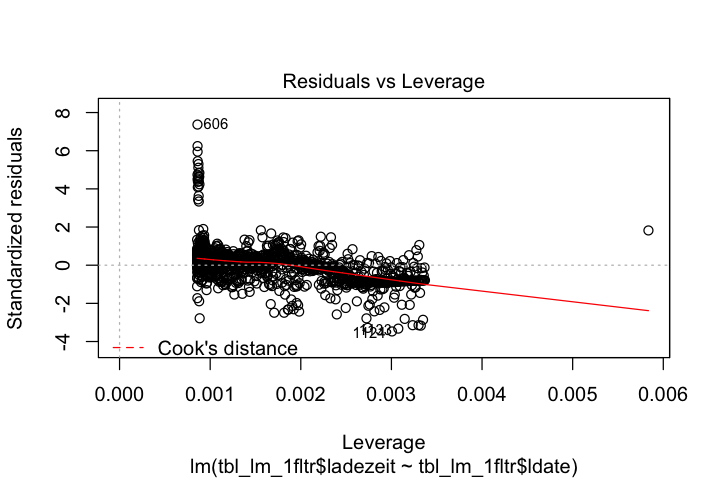

In [26]:
tbl_lm_1fltr <- tbl_lp_6fltr %>%
                    filter(table == "FA_AGG_SCCM_OVERVIEW")
summary(lin_model1)
options(repr.plot.width=6, repr.plot.height=4)
plot(tbl_lm_1fltr$ldate, tbl_lm_1fltr$ladezeit)
lin_model1 <- lm(tbl_lm_1fltr$ladezeit ~ tbl_lm_1fltr$ldate)
abline(lin_model1)
plot(lin_model1)

#### 4.2.1 Fazit zur Residuenanalyse
- Die Residuenanalyse zeigt **annähernd ein Lineares Verhalten**, wären da nicht die Ausreisser.

#### 4.3 Logistische Regression

Für eine Logistische Regression probiere ich die Daten zuerst mal zu Gruppieren. Für eine mögliche Ausfall-Logik habe ich folgende Bedingung definiert.<br>
- **Wenn der Mittelwert der Tabellenladezeit <= 300 sek. ist, wird für die Limitte(Obergrenze) der Max-Wert genommen. Ansonsten wird der Mittelwert * 2 gerechnet**.<br>
Wenn also die **Ladezeit > Limitte** gibs eine **1**, ansonsten eine 0.

In [27]:
# Vorbereitung der Daten für die Logistische Regression.
whtbl_logit <- merge(x=whtbl_loads,y=tbl_lp_all,by="table")

whtbl_logit <- whtbl_logit %>%
mutate(limit = case_when(
     .$Mittelwert <= 300 ~ .$Max,
    TRUE ~ .$Mittelwert * 2))

whtbl_logit <- whtbl_logit %>%
mutate(ausfall = case_when(
     .$ladezeit <= .$limit ~ 0,
#    .$ladezeit <= .$Mittelwert | .$Mittelwert <= 300 ~ 0,
    TRUE ~ 1))

#head(whtbl_logit,1)
#head(filter(whtbl_logit,ausfall == 1))
print("Total Einträge:")
print(nrow(whtbl_logit))
#nrow(whtbl_logit) # Alle einträge
whtbl_logit_1 <- whtbl_logit %>% filter(ausfall == 1)
#head(whtbl_logit_1,1)
print("Anzahl Einträge mit Ausfall:")
print(nrow(whtbl_logit_1)) # Einträge mit identifiziertem Ausfall

[1] "Total Einträge:"
[1] 703397
[1] "Anzahl Einträge mit Ausfall:"
[1] 2809


- Mit dieser Logik hat das System <b>2809</b> von <b>703397</b> als Ausfall identifiziert.

- Für die Logistische Regression nehmen wir wieder das Beispiel mit den Tabellen: **'FA_AGG_SCCM_OVERVIEW' & 'D_SD_ORDER_BUSINESS'**.

In [28]:
whtbl_logit_tbl1 <- whtbl_logit %>% filter(table %in% c("FA_AGG_SCCM_OVERVIEW","D_SD_ORDER_BUSINESS"))
#head(whtbl_logit_tbl1)
#head(whtbl_logit_tbl1 %>% filter(whtbl_logit_tbl1$ausfall == 1 & whtbl_logit_tbl1$table == "D_SD_ORDER_BUSINESS"),1)
#head(whtbl_logit_tbl1 %>% filter(whtbl_logit_tbl1$ausfall == 1 & whtbl_logit_tbl1$table == "FA_AGG_SCCM_OVERVIEW"),1)

#### Erstellen der Grafiken für die Logistische Regression

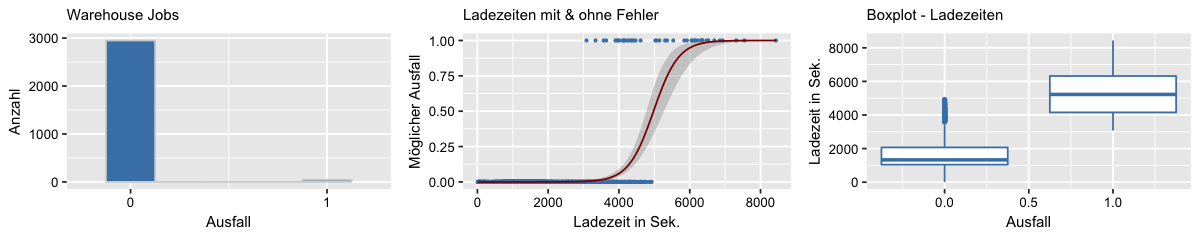

In [29]:
options(repr.plot.width=10, repr.plot.height=2)
plt1 <- ggplot(whtbl_logit_tbl1, aes(x=ausfall)) + 
        geom_histogram(binwidth=0.25,aes(y=..count..),color="lightgray", fill="steelblue", na.rm=TRUE) +
#        geom_text(aes(label = n), size = 2, color="white", position=position_dodge(width=0.9), vjust=-0.25) +
        xlab("Ausfall") + ylab("Anzahl") + scale_x_continuous(limits=c(-0.25,1.25),breaks = seq(0, 1, 1)) +
        ggtitle("Warehouse Jobs") +
        theme(axis.text.x = element_text(color="black", size=8, angle=0),
              axis.text.y = element_text(color="black", size=8, angle=0),
              axis.title = element_text(size=9,),
              plot.title = element_text(size=9))

plt2 <- ggplot(whtbl_logit_tbl1, aes(y=ausfall, x=ladezeit)) + 
        geom_point(color="steelblue", size=.5) + 
        geom_smooth(color='darkred', method=glm, size=.5, method.args = list(family = "binomial")) +
        xlab("Ladezeit in Sek.") + ylab("Möglicher Ausfall") +
        ggtitle("Ladezeiten mit & ohne Fehler") +
        theme(axis.text.x = element_text(color="black", size=8, angle=0),
              axis.text.y = element_text(color="black", size=8, angle=0),
              axis.title = element_text(size=9),
              plot.title = element_text(size=9))

plt3 <- ggplot(whtbl_logit_tbl1, aes(group=ausfall, y=ladezeit, x=ausfall)) + 
        geom_boxplot(outlier.size=.8,color="steelblue") + 
        xlab("Ausfall") + ylab("Ladezeit in Sek.") +
        ggtitle("Boxplot - Ladezeiten") +
        theme(axis.text.x = element_text(color="black", size=8, angle=0),
              axis.text.y = element_text(color="black", size=8, angle=0),
              axis.title = element_text(size=9),
              plot.title = element_text(size=9))

grid.arrange(plt1,plt2,plt3,
             layout_matrix = rbind(c(1,2,3)))

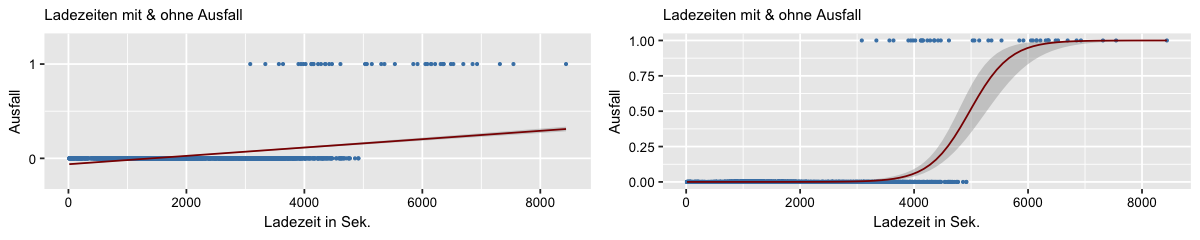

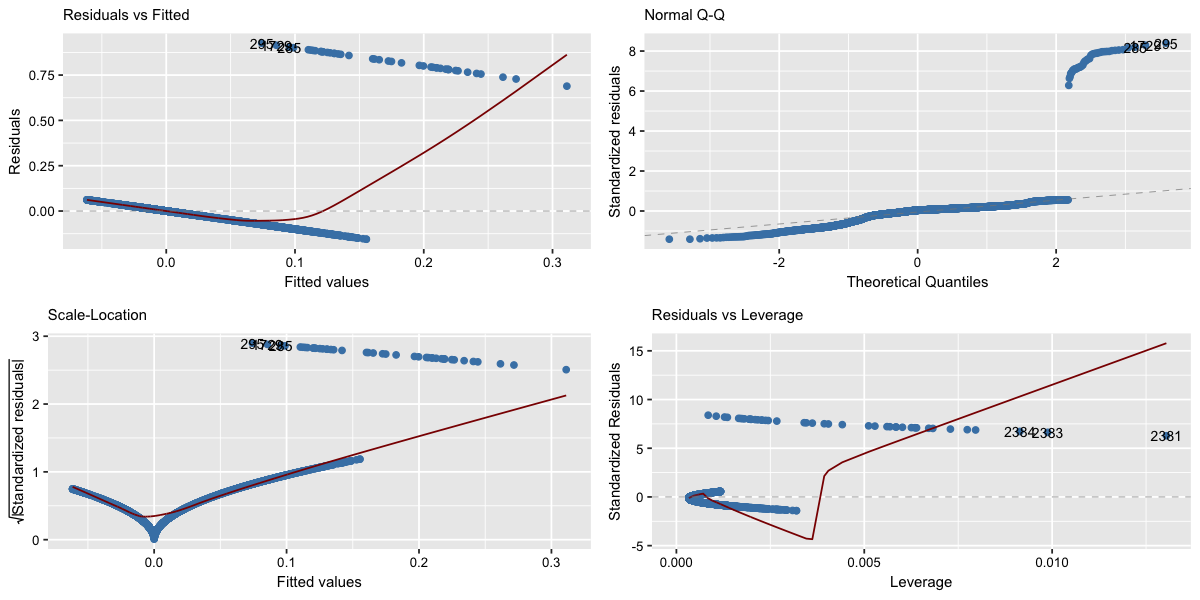

In [30]:
options(repr.plot.width=10, repr.plot.height=2)

plt1 <- ggplot(whtbl_logit_tbl1, aes(y=ausfall, x=ladezeit)) + 
        geom_point(color="steelblue", size=.5) + 
        geom_smooth(color='darkred', method=lm, size=.5) +
        scale_y_continuous(limits=c(-0.25,1.25),breaks = seq(0, 1, 1)) +
        ylab("Ausfall") + xlab("Ladezeit in Sek.") +
        ggtitle("Ladezeiten mit & ohne Ausfall") +
        theme(axis.text.x = element_text(color="black", size=8, angle=0),
              axis.text.y = element_text(color="black", size=8, angle=0),
              axis.title = element_text(size=9),
              plot.title = element_text(size=9))

plt2 <- ggplot(whtbl_logit_tbl1, aes(y=ausfall, x=ladezeit)) + 
        geom_point(color="steelblue", size=.5) + 
        geom_smooth(color='darkred', method=glm, size=.5, method.args = list(family = "binomial")) +
        ylab("Ausfall") + xlab("Ladezeit in Sek.") +
        ggtitle("Ladezeiten mit & ohne Ausfall") +
        theme(axis.text.x = element_text(color="black", size=8, angle=0),
              axis.text.y = element_text(color="black", size=8, angle=0),
              axis.title = element_text(size=9),
              plot.title = element_text(size=9))

grid.arrange(plt1,plt2,
             layout_matrix = rbind(c(1,2)))

options(repr.plot.width=10, repr.plot.height=5)
autoplot(lm(whtbl_logit_tbl1$ausfall~whtbl_logit_tbl1$ladezeit), label.size = 3, colour="steelblue",
        smooth.colour="darkred",) +
        theme(axis.text.x = element_text(color="black", size=8, angle=0),
              axis.text.y = element_text(color="black", size=8, angle=0),
              axis.title = element_text(size=9),
              plot.title = element_text(size=9))
       

#### 4.3.1 Fazit zur Logistischen Regression:
- Die Ausfallrate fängt bei rund **3000 Sek.** an zu steigen und erreicht bei rund **7000 Sek. die 100% Marke**.
- Es ist in diesem Fall nicht einfach das richtige Modell zu finden, da die Ladezeiten von Tabelle zu Tabelle sehr unterschiedlich sein können. <br> Vielleicht würde eine zusätzliche Gruppierung der Ladezeiten wie z.B. 0 - 500, 500 - 1000 Sek usw. bessere Ergebnisse liefern.

### 5. Schätzen
#### 5.1 Berechnen des wahren Mittelwertes

In [31]:
# Empirischen Mittelwert berechnen.
mean(whtbl_loads$ladezeit)

[1] 227.7597

In [32]:
n = 100000
# Wo liegen 99.5% der "Mittelwerte".
# bzw. in welchem Intervall liegt der "wahre" Mittelwert mit 99.5% Wahrscheinlichkeit?
sigma = 1
# Quantile der Standardnormalverteilung falls sigma gegeben.
mean(whtbl_loads$ladezeit) + 2.8  * sigma /sqrt(n)
mean(whtbl_loads$ladezeit) - 2.8  * sigma /sqrt(n)
# Quantile der t-Verteilung falls sigma nicht gegeben
mean(whtbl_loads$ladezeit)  + 2.8 * sd(whtbl_loads$ladezeit) /sqrt(n) 
mean(whtbl_loads$ladezeit)  - 2.8 * sd(whtbl_loads$ladezeit) /sqrt(n)

[1] 227.7686

[1] 227.7509

[1] 235.6851

[1] 219.8343

#### 5.1.1 Fazit zum wahren Mittelwert bei 99.5%:
- Der wahre Mittelwert liegt mit <b>99.5%</b> Wahrscheinlichkeit bei bekanntem Sigma im Intervall zwischen <b>227.750875860241</b> und <b>227.768584615138</b>.
- Der wahre Mittelwert liegt mit <b>99.5%</b> Wahrscheinlichkeit ohne Sigma im Intervall zwischen <b>219.834349270755</b> und <b>235.685111204624</b>.

In [33]:
n = 100000
# Wo liegen 95% der "Mittelwerte".
# bzw. in welchem Intervall liegt der "wahre" Mittelwert mit 95% Wahrscheinlichkeit?
sigma = 1
# Quantile der Standardnormalverteilung falls sigma gegeben.
mean(whtbl_loads$ladezeit) + 1.96  * sigma /sqrt(n)
mean(whtbl_loads$ladezeit) - 1.96  * sigma /sqrt(n)
# Quantile der t-Verteilung falls sigma nicht gegeben
mean(whtbl_loads$ladezeit)  + 1.96 * sd(whtbl_loads$ladezeit) /sqrt(n) 
mean(whtbl_loads$ladezeit)  - 1.96 * sd(whtbl_loads$ladezeit) /sqrt(n)

[1] 227.7659

[1] 227.7535

[1] 233.3075

[1] 222.212

#### 5.1.2 Fazit zum wahren Mittelwert bei 95%:
- Der wahre Mittelwert liegt mit <b>95%</b> Wahrscheinlichkeit bei bekanntem Sigma im Intervall zwischen <b>227.753532173475</b> und <b>227.765928301903</b>.
- Der wahre Mittelwert liegt mit <b>95%</b> Wahrscheinlichkeit ohne Sigma im Intervall zwischen <b>222.211963560835</b> und <b>233.307496914543</b>.

### 6. Prüfen der Daten auf Normalverteilung

#### 6.1 Daten der Normalverteilung
#### Setzen der zusätzlichen Gruppierungen wie Jahr & Monat, Jahr & Wochenzahl, Wochentag.

In [34]:
setDT(whtbl_loads)[, lmonth := format(as.Date(ldate), "%Y-%m") ]
whtbl_loads$lweek <- strftime(whtbl_loads$ldate, format = "%Y-W%V")
whtbl_loads$lweekn <- isoweek(whtbl_loads$ldate)
whtbl_loads$lweekday <- strftime(whtbl_loads$ldate, format = "%A")
head(whtbl_loads,2)

jobname,table,ldate,zeittot,ladezeit,lmonth,lweek,lweekn,lweekday
<chr>,<chr>,<date>,<drtn>,<dbl>,<chr>,<chr>,<int>,<chr>
da_dim_equipment.sas,DA_EQUIPMENT,2015-01-01,00:02:48.75,168.75,2015-01,2015-W01,1,Donnerstag
da_dim_equipment.sas,DA_EQUIPMENT,2015-01-02,00:02:36.66,156.66,2015-01,2015-W01,1,Freitag


#### Berechnen der Mittelwerte der Ladezeiten pro Job, Wochenzahl und Jahr 2019.

In [35]:
whtbl_loads_w <- whtbl_loads %>% 
                     select(jobname,ldate,ladezeit,lweek,lweekn) %>%
                     group_by(jobname,lweek,lweekn) %>%
                     filter(year(ldate) == 2019) %>%
                     summarize(Mittelwert_lz=round(mean(ladezeit)))
#head(whtbl_loads_w)

whtbl_loads_w1 <- whtbl_loads %>%
                     select(jobname,lweek,lweekn,ladezeit) %>%
                     group_by(jobname) %>%
                     summarize(Mittelwert_lz_jahr=round(mean(ladezeit)) ,Standardabweichung_lz_jahr=round(sd(ladezeit)))
#head(whtbl_loads_w1)

whtbl_loads_w <- inner_join(whtbl_loads_w,whtbl_loads_w1,by = c("jobname" = "jobname"))
head(whtbl_loads_w,2)

jobname,lweek,lweekn,Mittelwert_lz,Mittelwert_lz_jahr,Standardabweichung_lz_jahr
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
da_dim_equipment.sas,2019-W01,1,84,108,87
da_dim_equipment.sas,2019-W02,2,87,108,87


#### Filtern der Daten auf Mittelwert >= 300 Sekunden.

In [36]:
whtbl_loads_jobs <- whtbl_loads_w %>% filter(Mittelwert_lz_jahr >= 300)
head(whtbl_loads_jobs,2)

jobname,lweek,lweekn,Mittelwert_lz,Mittelwert_lz_jahr,Standardabweichung_lz_jahr
<chr>,<chr>,<int>,<dbl>,<dbl>,<dbl>
da_fact_license_mgmt.sas,2019-W01,1,378,322,845
da_fact_license_mgmt.sas,2019-W02,2,349,322,845


#### Erstellen der Histogramme von 6 zufällig ausgewählten Jobs.

In [37]:
jobs <- distinct(whtbl_loads_jobs,jobname)
n = nrow(jobs)
#head(jobs)
# Erstellen einer zufälligen Auswahl von 6 Jobs.
rand_jobs <- jobs[sample(n, 6), ]
head(rand_jobs)

jobname,lweek
<chr>,<chr>
daily_fact_scm.sas,2019-W22
daily_fact_sm_orders.sas,2019-W38
daily_fact_pricing.sas,2019-W49
da_fact_mat_trans_track.sas,2019-W33
daily_fact_finance1.sas,2019-W27
daily_fact_covp.sas,2019-W01


#### Filtern der 6 Jobs aus den Daten.

In [38]:
fltr1 = "da_fact_timestmp_inc.sas"
fltr2 = "daily_fact_finance3.sas"
fltr3 = "daily_fact_covp.sas"
fltr4 = "da_fact_license_mgmt.sas"
fltr5 = "daily_fact_counters.sas"
fltr6 = "daily_fact_finance1.sas"

whtbl_loads_6fltr <- whtbl_loads_jobs %>% filter(jobname %in% c(fltr1,fltr2,
                                                                fltr3,fltr4, 
                                                                fltr5, fltr6))
#whtbl_loads_6fltr <- inner_join(whtbl_loads_jobs,rand_jobs,by = c("jobname" = "jobname"))

#head(fltr1)
#head(whtbl_loads_6fltr)

#### 6.2 Histogamme der Normalverteilung 

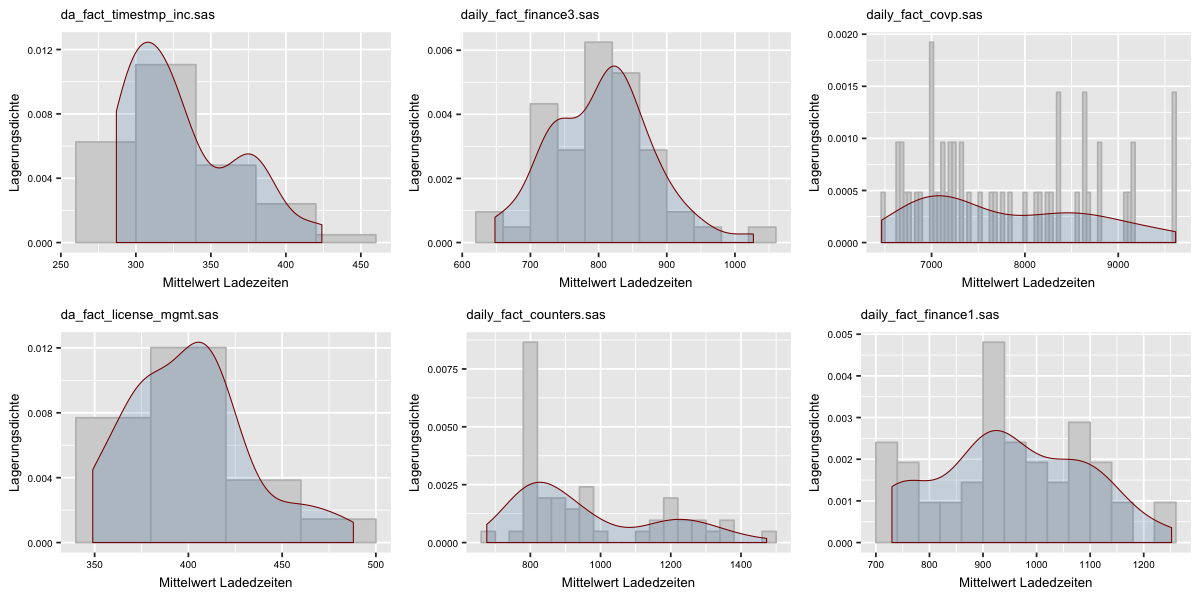

In [39]:
options(repr.plot.width=10, repr.plot.height=5)

plt1 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr1), aes(x=Mittelwert_lz)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="gray", fill="lightgray") + 
        geom_density(alpha=.2,fill="steelblue",color='darkred',size=.3) +
        xlab("Mittelwert Ladezeiten") + ylab("Lagerungsdichte") +
        ggtitle(fltr1) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))


plt2 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr2), aes(x=Mittelwert_lz)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="gray", fill="lightgray") + 
        geom_density(alpha=.2,fill="steelblue",color='darkred',size=.3) +
        xlab("Mittelwert Ladedzeiten") + ylab("Lagerungsdichte") +
        ggtitle(fltr2) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt3 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr3), aes(x=Mittelwert_lz)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="gray", fill="lightgray") + 
        geom_density(alpha=.2,fill="steelblue",color='darkred',size=.3) +
        xlab("Mittelwert Ladedzeiten") + ylab("Lagerungsdichte") +
        ggtitle(fltr3) +
         theme(axis.text.x = element_text(color="black", size=6, angle=0),
               axis.text.y = element_text(color="black", size=6, angle=0),
               axis.title = element_text(size=8),
               plot.title = element_text(size=8))

plt4 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr4), aes(x=Mittelwert_lz)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="gray", fill="lightgray") + 
        geom_density(alpha=.2,fill="steelblue",color='darkred',size=.3) +
        xlab("Mittelwert Ladedzeiten") + ylab("Lagerungsdichte") +
        ggtitle(fltr4) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt5 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr5), aes(x=Mittelwert_lz)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="gray", fill="lightgray") + 
        geom_density(alpha=.2,fill="steelblue",color='darkred',size=.3) +
        xlab("Mittelwert Ladedzeiten") + ylab("Lagerungsdichte") +
        ggtitle(fltr5) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt6 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr6), aes(x=Mittelwert_lz)) + 
        geom_histogram(binwidth=40,aes(y=..density..),color="gray", fill="lightgray") + 
        geom_density(alpha=.2,fill="steelblue",color='darkred',size=.3) +
        xlab("Mittelwert Ladedzeiten") + ylab("Lagerungsdichte") +
        ggtitle(fltr6) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

grid.arrange(plt1,plt2,plt3,plt4,plt5,plt6,
             layout_matrix = rbind(c(1,2,3),c(4,5,6)))

#### 6.3 Q-Q Plot der Normalverteilung

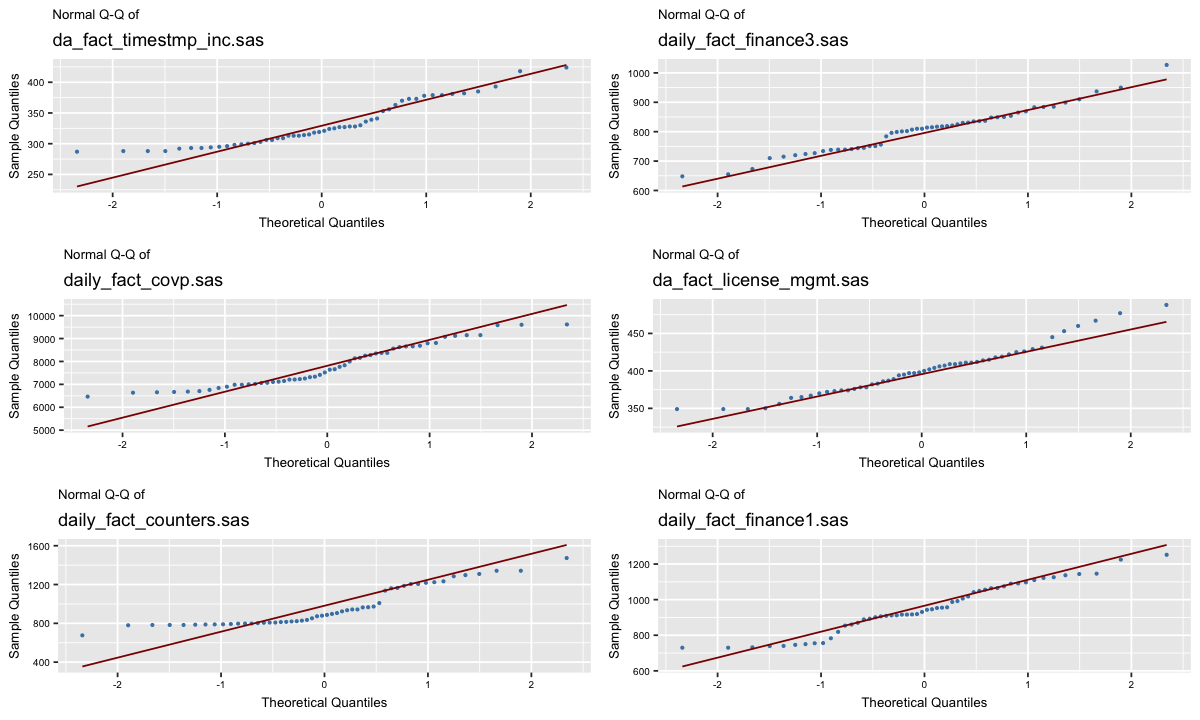

In [40]:
options(repr.plot.width=10, repr.plot.height=6)

plt1 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr1), aes(sample=Mittelwert_lz)) + 
        stat_qq(color="steelblue", size=.5) +
        stat_qq_line(color='darkred', size=.5) +
        xlab("Theoretical Quantiles") + ylab("Sample Quantiles") +
        ggtitle("Normal Q-Q of ", fltr1) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt2 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr2), aes(sample=Mittelwert_lz)) + 
        stat_qq(color="steelblue", size=.5) + 
        stat_qq_line(color='darkred', size=.5) +
        xlab("Theoretical Quantiles") + ylab("Sample Quantiles") +
        ggtitle("Normal Q-Q of ", fltr2) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt3 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr3), aes(sample=Mittelwert_lz)) + 
        stat_qq(color="steelblue", size=.5) +
        stat_qq_line(color='darkred', size=.5) +
        xlab("Theoretical Quantiles") + ylab("Sample Quantiles") +
        ggtitle("Normal Q-Q of ", fltr3) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt4 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr4), aes(sample=Mittelwert_lz)) + 
        stat_qq(color="steelblue", size=.5) +
        stat_qq_line(color='darkred', size=.5) +
        xlab("Theoretical Quantiles") + ylab("Sample Quantiles") +
        ggtitle("Normal Q-Q of ", fltr4) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt5 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr5), aes(sample=Mittelwert_lz)) + 
        stat_qq(color="steelblue", size=.5) + 
        stat_qq_line(color='darkred', size=.5) +
        xlab("Theoretical Quantiles") + ylab("Sample Quantiles") +
        ggtitle("Normal Q-Q of ", fltr5) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

plt6 <- ggplot(whtbl_loads_6fltr %>% filter(jobname == fltr6), aes(sample=Mittelwert_lz)) + 
        stat_qq(color="steelblue", size=.5) + 
        stat_qq_line(color='darkred', size=.5) +
        xlab("Theoretical Quantiles") + ylab("Sample Quantiles") +
        ggtitle("Normal Q-Q of ", fltr6) +
        theme(axis.text.x = element_text(color="black", size=6, angle=0),
              axis.text.y = element_text(color="black", size=6, angle=0),
              axis.title = element_text(size=8),
              plot.title = element_text(size=8))

grid.arrange(plt1,plt2,plt3,plt4,plt5,plt6,
             layout_matrix = rbind(c(1,2),c(3,4),c(5,6)))

#### 6.4 Tests der Normalverteilung
- Anderson-Darling-Test
- Kolmogorov-Smirnov-Test
- Shapiro-Wilk-Test
- Jarque-Bera-Test

In [41]:
whtbl_loads_1fltr <- filter(whtbl_loads_6fltr,jobname == fltr1)
whtbl_loads_2fltr <- filter(whtbl_loads_6fltr,jobname == fltr2)
whtbl_loads_3fltr <- filter(whtbl_loads_6fltr,jobname == fltr3)
whtbl_loads_4fltr <- filter(whtbl_loads_6fltr,jobname == fltr4)
whtbl_loads_5fltr <- filter(whtbl_loads_6fltr,jobname == fltr5)
whtbl_loads_6fltr <- filter(whtbl_loads_6fltr,jobname == fltr6)
#head(whtbl_loads_1fltr)
#ks.test(whtbl_loads_1fltr$Mittelwert_lz, "pnorm")

In [42]:
options(warn=-1)
#Test-Table-1
tests = vector()
tests = c(tests,whtbl_loads_1fltr$jobname[1],
         round(ad.test(whtbl_loads_1fltr$Mittelwert_lz)$statistic,digits=5),
         round(ad.test(whtbl_loads_1fltr$Mittelwert_lz)$p.value,digits=5),
         round(ks.test(whtbl_loads_1fltr$Mittelwert_lz,"pnorm")$statistic,digits=5),
         round(ks.test(whtbl_loads_1fltr$Mittelwert_lz,"pnorm")$p.value,digits=5),
         round(shapiro.test(whtbl_loads_1fltr$Mittelwert_lz)$statistic,digits=5),
         round(shapiro.test(whtbl_loads_1fltr$Mittelwert_lz)$p.value,digits=5),
         round(jarque.bera.test(whtbl_loads_1fltr$Mittelwert_lz)$statistic,digits=5),
         round(jarque.bera.test(whtbl_loads_1fltr$Mittelwert_lz)$p.value,digits=5))

tbl_test1 = data.frame(tests[1],tests[2],tests[3],tests[4],tests[5],
                     tests[6],tests[7],tests[8],tests[9])
colnames(tbl_test1)[1] = "Jobname";colnames(tbl_test1)[2] = "Anderson-Darling-statistic"
colnames(tbl_test1)[3] = "Anderson-Darling_p-value";colnames(tbl_test1)[4] = "Kolmogorov-Smirnov-statistic"
colnames(tbl_test1)[5] = "Kolmogorov-Smirnov-p-value";colnames(tbl_test1)[6] = "Shapiro-Wilk-statistic"
colnames(tbl_test1)[7] = "Shapiro-Wilk-p-value";colnames(tbl_test1)[8] = "Jarque-Bera-statistic"
colnames(tbl_test1)[9] = "Jarque-Bera-p-value"
#Test-Table-2
tbl_test2 = data.frame(whtbl_loads_2fltr$jobname[1],
                      round(ad.test(whtbl_loads_2fltr$Mittelwert_lz)$statistic,digits=5),
                      round(ad.test(whtbl_loads_2fltr$Mittelwert_lz)$p.value,digits=5),
                      round(ks.test(whtbl_loads_2fltr$Mittelwert_lz,"pnorm")$statistic,digits=5),
                      round(ks.test(whtbl_loads_2fltr$Mittelwert_lz,"pnorm")$p.value,digits=5),
                      round(shapiro.test(whtbl_loads_2fltr$Mittelwert_lz)$statistic,digits=5),
                      round(shapiro.test(whtbl_loads_2fltr$Mittelwert_lz)$p.value,digits=5),
                      round(jarque.bera.test(whtbl_loads_2fltr$Mittelwert_lz)$statistic,digits=5),
                      round(jarque.bera.test(whtbl_loads_2fltr$Mittelwert_lz)$p.value,digits=5))
colnames(tbl_test2)[1] = "Jobname";colnames(tbl_test2)[2] = "Anderson-Darling-statistic"
colnames(tbl_test2)[3] = "Anderson-Darling_p-value";colnames(tbl_test2)[4] = "Kolmogorov-Smirnov-statistic"
colnames(tbl_test2)[5] = "Kolmogorov-Smirnov-p-value";colnames(tbl_test2)[6] = "Shapiro-Wilk-statistic"
colnames(tbl_test2)[7] = "Shapiro-Wilk-p-value";colnames(tbl_test2)[8] = "Jarque-Bera-statistic"
colnames(tbl_test2)[9] = "Jarque-Bera-p-value"
#Test-Table-3
tbl_test3 = data.frame(whtbl_loads_3fltr$jobname[1],
                      round(ad.test(whtbl_loads_3fltr$Mittelwert_lz)$statistic,digits=5),
                      round(ad.test(whtbl_loads_3fltr$Mittelwert_lz)$p.value,digits=5),
                      round(ks.test(whtbl_loads_3fltr$Mittelwert_lz,"pnorm")$statistic,digits=5),
                      round(ks.test(whtbl_loads_3fltr$Mittelwert_lz,"pnorm")$p.value,digits=5),
                      round(shapiro.test(whtbl_loads_3fltr$Mittelwert_lz)$statistic,digits=5),
                      round(shapiro.test(whtbl_loads_3fltr$Mittelwert_lz)$p.value,digits=5),
                      round(jarque.bera.test(whtbl_loads_3fltr$Mittelwert_lz)$statistic,digits=5),
                      round(jarque.bera.test(whtbl_loads_3fltr$Mittelwert_lz)$p.value,digits=5))
colnames(tbl_test3)[1] = "Jobname";colnames(tbl_test3)[2] = "Anderson-Darling-statistic"
colnames(tbl_test3)[3] = "Anderson-Darling_p-value";colnames(tbl_test3)[4] = "Kolmogorov-Smirnov-statistic"
colnames(tbl_test3)[5] = "Kolmogorov-Smirnov-p-value";colnames(tbl_test3)[6] = "Shapiro-Wilk-statistic"
colnames(tbl_test3)[7] = "Shapiro-Wilk-p-value";colnames(tbl_test3)[8] = "Jarque-Bera-statistic"
colnames(tbl_test3)[9] = "Jarque-Bera-p-value"
#Test-Table-4
tbl_test4 = data.frame(whtbl_loads_4fltr$jobname[1],
                      round(ad.test(whtbl_loads_4fltr$Mittelwert_lz)$statistic,digits=5),
                      round(ad.test(whtbl_loads_4fltr$Mittelwert_lz)$p.value,digits=5),
                      round(ks.test(whtbl_loads_4fltr$Mittelwert_lz,"pnorm")$statistic,digits=5),
                      round(ks.test(whtbl_loads_4fltr$Mittelwert_lz,"pnorm")$p.value,digits=5),
                      round(shapiro.test(whtbl_loads_4fltr$Mittelwert_lz)$statistic,digits=5),
                      round(shapiro.test(whtbl_loads_4fltr$Mittelwert_lz)$p.value,digits=5),
                      round(jarque.bera.test(whtbl_loads_4fltr$Mittelwert_lz)$statistic,digits=5),
                      round(jarque.bera.test(whtbl_loads_4fltr$Mittelwert_lz)$p.value,digits=5))
colnames(tbl_test4)[1] = "Jobname";colnames(tbl_test4)[2] = "Anderson-Darling-statistic"
colnames(tbl_test4)[3] = "Anderson-Darling_p-value";colnames(tbl_test4)[4] = "Kolmogorov-Smirnov-statistic"
colnames(tbl_test4)[5] = "Kolmogorov-Smirnov-p-value";colnames(tbl_test4)[6] = "Shapiro-Wilk-statistic"
colnames(tbl_test4)[7] = "Shapiro-Wilk-p-value";colnames(tbl_test4)[8] = "Jarque-Bera-statistic"
colnames(tbl_test4)[9] = "Jarque-Bera-p-value"
#Test-Table-5
tbl_test5 = data.frame(whtbl_loads_5fltr$jobname[1],
                      round(ad.test(whtbl_loads_5fltr$Mittelwert_lz)$statistic,digits=5),
                      round(ad.test(whtbl_loads_5fltr$Mittelwert_lz)$p.value,digits=5),
                      round(ks.test(whtbl_loads_5fltr$Mittelwert_lz,"pnorm")$statistic,digits=5),
                      round(ks.test(whtbl_loads_5fltr$Mittelwert_lz,"pnorm")$p.value,digits=5),
                      round(shapiro.test(whtbl_loads_5fltr$Mittelwert_lz)$statistic,digits=5),
                      round(shapiro.test(whtbl_loads_5fltr$Mittelwert_lz)$p.value,digits=5),
                      round(jarque.bera.test(whtbl_loads_5fltr$Mittelwert_lz)$statistic,digits=5),
                      round(jarque.bera.test(whtbl_loads_5fltr$Mittelwert_lz)$p.value,digits=5))
colnames(tbl_test5)[1] = "Jobname";colnames(tbl_test5)[2] = "Anderson-Darling-statistic"
colnames(tbl_test5)[3] = "Anderson-Darling_p-value";colnames(tbl_test5)[4] = "Kolmogorov-Smirnov-statistic"
colnames(tbl_test5)[5] = "Kolmogorov-Smirnov-p-value";colnames(tbl_test5)[6] = "Shapiro-Wilk-statistic"
colnames(tbl_test5)[7] = "Shapiro-Wilk-p-value";colnames(tbl_test5)[8] = "Jarque-Bera-statistic"
colnames(tbl_test5)[9] = "Jarque-Bera-p-value"
#Test-Table-6
tbl_test6 = data.frame(whtbl_loads_6fltr$jobname[1],
                      round(ad.test(whtbl_loads_6fltr$Mittelwert_lz)$statistic,digits=5),
                      round(ad.test(whtbl_loads_6fltr$Mittelwert_lz)$p.value,digits=5),
                      round(ks.test(whtbl_loads_6fltr$Mittelwert_lz,"pnorm")$statistic,digits=5),
                      round(ks.test(whtbl_loads_6fltr$Mittelwert_lz,"pnorm")$p.value,digits=5),
                      round(shapiro.test(whtbl_loads_6fltr$Mittelwert_lz)$statistic,digits=5),
                      round(shapiro.test(whtbl_loads_6fltr$Mittelwert_lz)$p.value,digits=5),
                      round(jarque.bera.test(whtbl_loads_6fltr$Mittelwert_lz)$statistic,digits=5),
                      round(jarque.bera.test(whtbl_loads_6fltr$Mittelwert_lz)$p.value,digits=5))
colnames(tbl_test6)[1] = "Jobname";colnames(tbl_test6)[2] = "Anderson-Darling-statistic"
colnames(tbl_test6)[3] = "Anderson-Darling_p-value";colnames(tbl_test6)[4] = "Kolmogorov-Smirnov-statistic"
colnames(tbl_test6)[5] = "Kolmogorov-Smirnov-p-value";colnames(tbl_test6)[6] = "Shapiro-Wilk-statistic"
colnames(tbl_test6)[7] = "Shapiro-Wilk-p-value";colnames(tbl_test6)[8] = "Jarque-Bera-statistic"
colnames(tbl_test6)[9] = "Jarque-Bera-p-value"
print(tbl_test1[1]);print(tbl_test1[3]);print(tbl_test1[5]);print(tbl_test1[7]);print(tbl_test1[9])
print("----------------------")
print(tbl_test2[1]);print(tbl_test2[3]);print(tbl_test2[5]);print(tbl_test2[7]);print(tbl_test2[9])
print("----------------------")
print(tbl_test3[1]);print(tbl_test3[3]);print(tbl_test3[5]);print(tbl_test3[7]);print(tbl_test3[9])
print("----------------------")
print(tbl_test4[1]);print(tbl_test4[3]);print(tbl_test4[5]);print(tbl_test4[7]);print(tbl_test4[9])
print("----------------------")
print(tbl_test5[1]);print(tbl_test5[3]);print(tbl_test5[5]);print(tbl_test5[7]);print(tbl_test5[9])
print("----------------------")
print(tbl_test6[1]);print(tbl_test6[3]);print(tbl_test6[5]);print(tbl_test6[7]);print(tbl_test6[9])
print("----------------------")
#head(tbl_test1)
#head(tbl_test2)
#head(tbl_test3)
#head(tbl_test4)
#head(tbl_test5)
#head(tbl_test6)
options(warn=0)

                   Jobname
A da_fact_timestmp_inc.sas
  Anderson-Darling_p-value
A                  0.00012
  Kolmogorov-Smirnov-p-value
A                          0
  Shapiro-Wilk-p-value
A                4e-04
  Jarque-Bera-p-value
A             0.05065
[1] "----------------------"
                  Jobname
A daily_fact_finance3.sas
  Anderson-Darling_p-value
A                  0.26495
  Kolmogorov-Smirnov-p-value
A                          0
  Shapiro-Wilk-p-value
A              0.42149
  Jarque-Bera-p-value
A             0.59123
[1] "----------------------"
              Jobname
A daily_fact_covp.sas
  Anderson-Darling_p-value
A                  0.00229
  Kolmogorov-Smirnov-p-value
A                          0
  Shapiro-Wilk-p-value
A              0.00382
  Jarque-Bera-p-value
A             0.13977
[1] "----------------------"
                   Jobname
A da_fact_license_mgmt.sas
  Anderson-Darling_p-value
A                  0.22495
  Kolmogorov-Smirnov-p-value
A                   

#### 6.5 Fazit der Normalverteilung:
Die Ergebnisse der einzelnen Tests zeigen ein gemischtes Bild.

#### Folgende Tabellen sind laut den Tests Normalverteilt p-value >= 0.05:
- **daily_fact_finance3.sas**
- **da_fact_license_mgmt.sas**
- **da_fact_license_mgmt.sas** 

<br>Die restlichen Tabellen sind <b>nicht</b> Normalverteilt. <br>
Info: Der Kolmogorov-Smirnov Test hatte zu wenig Daten für eine Analyse.

### 7. Hypothesen
#### 7.1 Definition der Hypothesen
#### Hypothese 1:
- H0: Die mittlere Ladezeit(Mittelwert) pro Jahr und Job, ist bei **mindestens 50% aller Jobs angestiegen**.
- H1: Die mittlere Ladezeit(Mittelwert) pro Jahr und Job, ist bei **weniger als 50% aller Jobs angestiegen**.

#### Hypothese 2:
- H0: Gewisse Wochentage haben **einen negativen Effekt** auf die Ladezeiten der einzelnen Tabellen. **Abweichung >= 5%**
- H1: Gewisse Wochentage haben **keinen negativen Effekt** auf die Ladezeiten der einzelnen Tabellen. **Abweichung < 5%**

#### 7.2 Test zu Hypothese 1
- Erzeugen der zusätzlichen Datenfelder wie Jahr, Wochentage-Nummerisch, Wochentag-Name

In [43]:
whtbl_loads_jobs <- whtbl_loads %>%
                    select(jobname,ldate,ladezeit)
library(data.table)
whtbl_loads_jobs$lyear <- year(whtbl_loads_jobs$ldate)
whtbl_loads_jobs$lweekdayn <- as.numeric(strftime(as.Date(whtbl_loads$ldate, "%d-%m-%Y"), "%u"))
whtbl_loads_jobs$lweekday <- strftime(whtbl_loads$ldate, format = "%A")
#head(whtbl_loads_jobs)

- Berechnen der Mittelwerte pro Job von 2015 bis 2018 und der Mittelwerte pro Job und Jahr 2019.

In [44]:
whtbl_loads_jobs1 <- whtbl_loads_jobs %>%
                     select(jobname,ladezeit,lyear) %>%
                     filter(between(lyear, 2015, 2018))

whtbl_loads_jobs1 <- whtbl_loads_jobs1 %>%
                     select(jobname,ladezeit,lyear) %>%
                     group_by(jobname) %>%
                     summarize(Mittelwert1_lz=mean(ladezeit))
#head(whtbl_loads_jobs1)

whtbl_loads_jobs2 <- whtbl_loads_jobs %>%
                     select(jobname,ladezeit,lyear) %>%
                     filter(lyear == 2019)
whtbl_loads_jobs2 <- whtbl_loads_jobs2 %>%
                     select(jobname,ladezeit,lyear) %>%
                     group_by(jobname) %>%
                     summarize(Mittelwert2_lz=mean(ladezeit))
whtbl_loads_jobs3 <- inner_join(whtbl_loads_jobs1,whtbl_loads_jobs2,by = c("jobname" = "jobname"))

#head(whtbl_loads_jobs3)
whtbl_loads_jobs3 <- whtbl_loads_jobs3 %>%
                     mutate(y = case_when(Mittelwert2_lz > Mittelwert1_lz ~ 1,Mittelwert2_lz < Mittelwert1_lz ~ 0))
#head(whtbl_loads_jobs3)
whtbl_loads_jobs4 <- whtbl_loads_jobs3 %>%
                     count(y)
whtbl_loads_jobs5 <- whtbl_loads_jobs4 %>%
                     select(n) %>%
                     summarize(N_all=sum(n))
#head(whtbl_loads_jobs4)
#head(whtbl_loads_jobs5)

In [45]:
summary(whtbl_loads_jobs3$y)
shapiro.test(whtbl_loads_jobs3$y)
t.test(whtbl_loads_jobs3$y,mu=0.5,alternative=c("less"))
binom.test(46,88,p=0.5,alternative="less")

   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.0000  1.0000  0.5227  1.0000  1.0000 


	Shapiro-Wilk normality test

data:  whtbl_loads_jobs3$y
W = 0.63567, p-value = 1.878e-13



	One Sample t-test

data:  whtbl_loads_jobs3$y
t = 0.42441, df = 87, p-value = 0.6638
alternative hypothesis: true mean is less than 0.5
95 percent confidence interval:
      -Inf 0.6117576
sample estimates:
mean of x 
0.5227273 



	Exact binomial test

data:  46 and 88
number of successes = 46, number of trials = 88, p-value = 0.7029
alternative hypothesis: true probability of success is less than 0.5
95 percent confidence interval:
 0.0000000 0.6143482
sample estimates:
probability of success 
             0.5227273 


#### 7.3 Fazit zu Hypothese 1:
- Anhand des t.tests mit einem p-value von <b>0.6638</b> und einem Mean von <b>0.5227</b> kann die Nullhypothese H0 >= 0.5 <b>nicht</b> abgelehnt werden.
- Zusätzlich hat der binomial test fast die gleichen Werte ergeben. <b>P-value: 0.7029 und probalbility of success: 0.5227.</b>
- Bei rund <b>52%</b> der Jobs ist die Ladezeit im Jahr 2019 gegenüber den Vorjahren <b>angestiegen</b>.

#### 7.4 Test zu Hypothese 2

In [46]:
whtbl_loads_limit <- whtbl_loads_jobs %>%
                     select(ladezeit) %>%
                     summarize(Limit_lz=round(mean(ladezeit))*1.05)
whtbl_loads_wt <- whtbl_loads_jobs %>%
                     select(ladezeit,lweekdayn) %>%
                     group_by(lweekdayn) %>%
                     summarize(Mittelwert_lz=round(mean(ladezeit)))
#head(whtbl_loads_wt,7)
#summary(whtbl_loads_wt)
whtbl_loads_wt1 <- whtbl_loads_wt %>%
                   summarize(StdAbweichung=round(sd(Mittelwert_lz)))
#head(whtbl_loads_limit)

In [47]:
t.test(x=whtbl_loads_wt$Mittelwert_lz,mu=whtbl_loads_limit$Limit_lz)


	One Sample t-test

data:  whtbl_loads_wt$Mittelwert_lz
t = -5.359, df = 6, p-value = 0.00173
alternative hypothesis: true mean is not equal to 239.4
95 percent confidence interval:
 222.5866 233.1276
sample estimates:
mean of x 
 227.8571 


#### 7.5 Fazit zu Hypothese 2:
- Der t.test zeigt einen p-value von <b>0.00173</b>, somit wird die Nullhypothese(H0) <b>Abweichung >= 5% verworfen</b>.
- Die Alternativhypothese H1 mit einer <b>Abweichung < 5% wird daher angenommen</b>. Keine der Wochentage hat einen Signifikanten Einfluss von über 5% auf die Ladezeiten.
- Der Freitag hat tendenziell die höchste Ladezeit, liegt aber immer noch in der Toleranz.

### 8. Zeitreihenanalyse
#### 8.1 Daten der Zeitreihenanalyse
- Hinzufügen des Load-Datums im YYYY-MM format als lyearmonth.
- Hinzufügen des Load-Datums im YYYY format als lyear.

In [48]:
whtbl_load_tbl <- whtbl_loads %>% filter(table == "DA_EQUIPMENT")
whtbl_load_tbl$lyearmonth <- as.yearmon(whtbl_load_tbl$ldate, '%Y%m') #Datumsformat YYYY-MM
whtbl_load_tbl$lyear <- year(whtbl_load_tbl$ldate) # Datumsformat YYYY
#head(whtbl_load_tbl)

#### Berechnen des Mittelwertes pro Tabelle, Jahr & Monat.

In [49]:
length(whtbl_load_tbl$ladezeit)
whtbl_load_tblm <- whtbl_load_tbl %>%
                   select(table,ladezeit,lyear,lyearmonth) %>%
                   group_by(table,lyear,lyearmonth) %>%
                   summarize(ladezeit_mean=mean(ladezeit))
head(whtbl_load_tblm,2)

[1] 1825

table,lyear,lyearmonth,ladezeit_mean
<chr>,<int>,<yearmon>,<dbl>
DA_EQUIPMENT,2015,Jan 2015,161.0686
DA_EQUIPMENT,2015,Feb 2015,119.1843


#### 8.2 Zeitreihenanalyse mit ARIMA, ETS & STL

In [50]:
y <- ts(whtbl_load_tblm$ladezeit_mean,start = 2015, end = 2020, frequency = 12)
#a <- auto.arima(y,trace=TRUE,stepwise=FALSE)

- Die Auto ARIMA Funktion mit den Einstellungen **trace=FRUE & stepwise=FALSE** hat folgendes Modell vorgeschlagen:**(0,1,1)**.

In [51]:
#a = auto.arima(y)
a = arima(y, order=c(0,1,1))
forecast(a,h=12)
summary(a)
#plot(y)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Feb 2020       178.1108 154.1723 202.0492 141.5001 214.7214
Mar 2020       178.1108 152.0106 204.2109 138.1941 218.0274
Apr 2020       178.1108 150.0148 206.2067 135.1417 221.0798
May 2020       178.1108 148.1516 208.0699 132.2922 223.9294
Jun 2020       178.1108 146.3977 209.8238 129.6098 226.6117
Jul 2020       178.1108 144.7358 211.4857 127.0682 229.1534
Aug 2020       178.1108 143.1528 213.0687 124.6472 231.5743
Sep 2020       178.1108 141.6385 214.5830 122.3313 233.8902
Oct 2020       178.1108 140.1846 216.0369 120.1077 236.1138
Nov 2020       178.1108 138.7844 217.4371 117.9663 238.2552
Dec 2020       178.1108 137.4324 218.7891 115.8986 240.3229
Jan 2021       178.1108 136.1239 220.0976 113.8974 242.3241


Call:
arima(x = y, order = c(0, 1, 1))

Coefficients:
          ma1
      -0.5655
s.e.   0.1232

sigma^2 estimated as 348.9:  log likelihood = -260.97,  aic = 525.95

Training set error measures:
                    ME     RMSE      MAE        MPE     MAPE     MASE
Training set 0.9435063 18.52552 13.76009 -0.3522902 8.343695 0.985589
                   ACF1
Training set 0.08277438


In [52]:
b = ets(y)
forecast(b,h=12)
summary(b)

         Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
Feb 2020       177.3458 151.5330 203.1586 137.8685 216.8231
Mar 2020       177.3458 149.4879 205.2038 134.7407 219.9509
Apr 2020       177.3458 147.5791 207.1125 131.8215 222.8701
May 2020       177.3458 145.7818 208.9098 129.0729 225.6187
Jun 2020       177.3458 144.0781 210.6135 126.4673 228.2243
Jul 2020       177.3458 142.4542 212.2374 123.9837 230.7080
Aug 2020       177.3458 140.8993 213.7923 121.6057 233.0859
Sep 2020       177.3458 139.4051 215.2865 119.3205 235.3711
Oct 2020       177.3458 137.9645 216.7271 117.1174 237.5742
Nov 2020       177.3458 136.5720 218.1196 114.9877 239.7039
Dec 2020       177.3458 135.2227 219.4689 112.9241 241.7675
Jan 2021       177.3458 133.9126 220.7790 110.9204 243.7712

ETS(M,N,N) 

Call:
 ets(y = y) 

  Smoothing parameters:
    alpha = 0.4033 

  Initial states:
    l = 146.4466 

  sigma:  0.1136

     AIC     AICc      BIC 
609.1192 609.5403 615.4518 

Training set error measures:
                   ME     RMSE      MAE        MPE     MAPE      MASE
Training set 1.256052 18.53055 14.07184 -0.1704608 8.526775 0.5743825
                   ACF1
Training set 0.08654631


In [53]:
c = stl(y, t.window=12, s.window="periodic", robust=TRUE)
forecast(c)
summary(c)

         Point Forecast    Lo 80    Hi 80     Lo 95    Hi 95
Feb 2020       175.3264 150.8796 199.7733 137.93819 212.7147
Mar 2020       179.1360 152.2465 206.0256 138.01199 220.2601
Apr 2020       179.7037 150.5704 208.8371 135.14814 224.2594
May 2020       174.9698 143.7487 206.1910 127.22124 222.7184
Jun 2020       169.1560 135.9736 202.3384 118.40789 219.9041
Jul 2020       176.0373 140.9989 211.0757 122.45066 229.6239
Aug 2020       169.7068 132.9017 206.5119 113.41828 225.9953
Sep 2020       177.7510 139.2563 216.2458 118.87839 236.6236
Oct 2020       174.6478 134.5307 214.7649 113.29396 236.0017
Nov 2020       185.7604 144.0803 227.4405 122.01616 249.5046
Dec 2020       180.3158 137.1256 223.5059 114.26214 246.3694
Jan 2021       176.8535 132.2009 221.5061 108.56322 245.1438
Feb 2021       175.3264 129.2544 221.3985 104.86532 245.7876
Mar 2021       179.1360 131.6837 226.5884 106.56396 251.7081
Apr 2021       179.7037 130.9070 228.5005 105.07552 254.3320
May 2021       174.9698 

 Call:
 stl(x = y, s.window = "periodic", t.window = 12, robust = TRUE)

 Time.series components:
    seasonal             trend            remainder        
 Min.   :-7.457729   Min.   :140.2341   Min.   :-28.37930  
 1st Qu.:-1.643872   1st Qu.:150.2383   1st Qu.: -6.36856  
 Median : 0.239783   Median :163.9714   Median :  0.41598  
 Mean   : 0.003931   Mean   :161.4676   Mean   :  1.43908  
 3rd Qu.: 2.522316   3rd Qu.:171.4545   3rd Qu.:  6.50188  
 Max.   : 9.146670   Max.   :180.8954   Max.   : 59.85182  
 IQR:
     STL.seasonal STL.trend STL.remainder data  
      4.166       21.216    12.870        32.270
   %  12.9         65.7      39.9         100.0 

 Weights:
   Min. 1st Qu.  Median    Mean 3rd Qu.    Max. 
 0.0000  0.8130  0.9452  0.8311  0.9785  1.0000 

 Other components: List of 5
 $ win  : Named num [1:3] 611 12 13
 $ deg  : Named int [1:3] 0 1 1
 $ jump : Named num [1:3] 62 2 2
 $ inner: int 1
 $ outer: int 15


#### 8.3 Zeitreihenanalyse mit Decompose

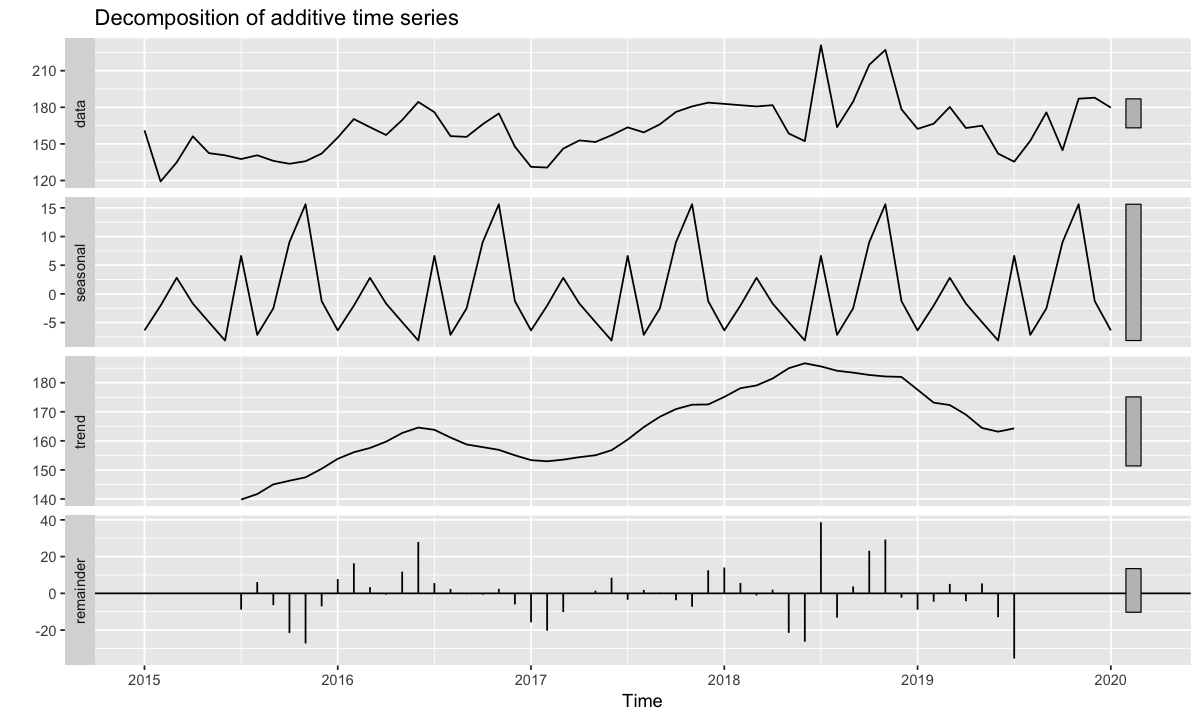

In [54]:
options(repr.plot.width=10, repr.plot.height=6)
dec = decompose(y)
autoplot(dec)

#### 8.3.1 Fazit Decompose:
- Im Trend sieht man das **Ansteigen der Ladezeiten im Jahr 2018**. Diesen Effekt haben wir schon bei **allen Datensätzen** beobachten können. <br>
Da dieses Problem auf aine **falsche Konfiguration zurückzuführen war** und es auch danach behoben wurde, hat sich die Ladezeit, wie man schön sieht, wieder auf das **normale Niveau reguliert**.

#### 8.4 Forecast mit ARIMA

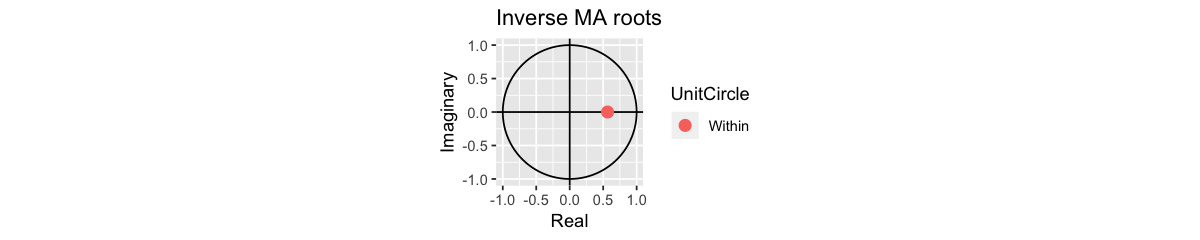

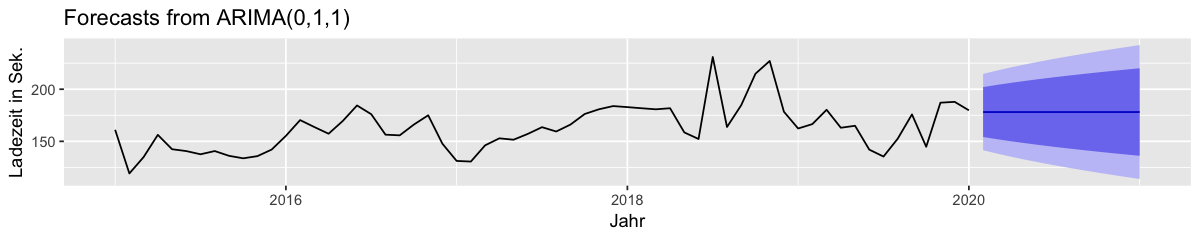

In [58]:
arima(y, order=c(0,1,1)) %>% autoplot()
options(repr.plot.width=10, repr.plot.height=2)
a %>% forecast(h=12) %>% autoplot() + xlab("Jahr") + ylab("Ladezeit in Sek.")

#### 8.4.1 Fazit Forecast ARIMA:
- Der Forecast mit ARIMA hat **einen gleichmässigen Trend für das Jahr 2020 berechnet**.
- Die Inverse MA roots Grafik zeigt einen Wert von ca. **0.6** und liegt **innerhalb des Kreises**. So wie ich das verstehe, fittet dieses Modell relativ gut auf die Daten.

#### 8.5 Forecast mit ETS

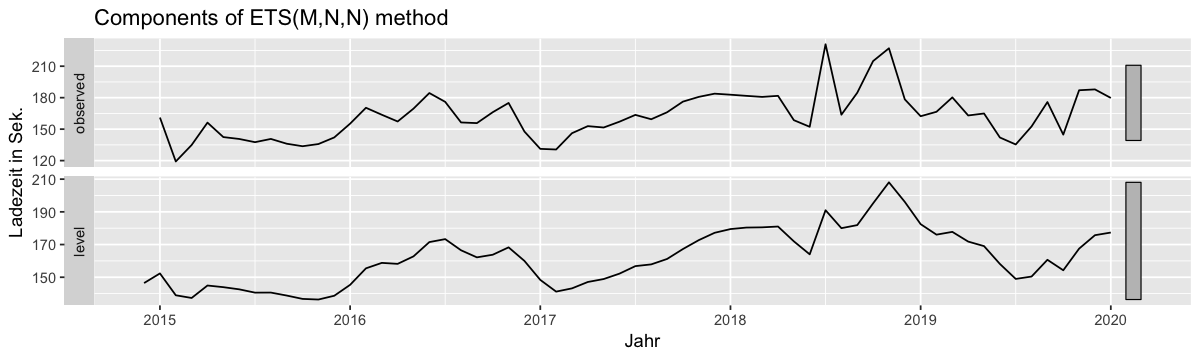

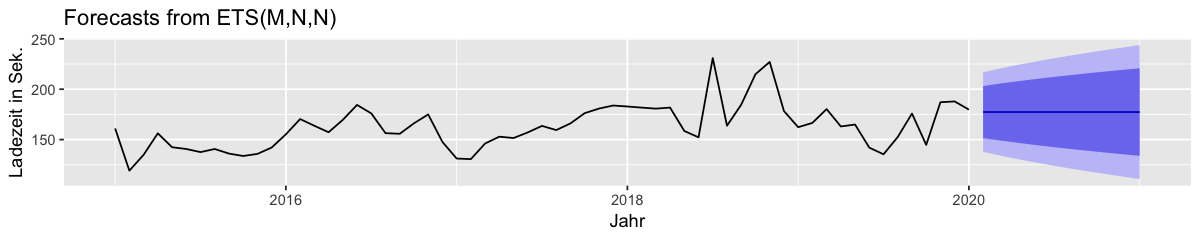

In [56]:
options(repr.plot.width=10, repr.plot.height=3)
ets(y) %>% autoplot() + xlab("Jahr") + ylab("Ladezeit in Sek.")
options(repr.plot.width=10, repr.plot.height=2)
b %>% forecast(h=12) %>% autoplot() + xlab("Jahr") + ylab("Ladezeit in Sek.")

#### 8.5.1 Fazit Forecast ETS:
- Auch die Exponentielle Glättung bringt die gleichen Resultate heraus wie das ARIMA Modell. <br>Die Konfidenzbänder sind hier etwas gleich breit wie bei ARIMA, was eigentlich kein schlechtes Ergebnis ist.<br>
Da die Daten keine klare Tendenz zeigen, kann das Modell auch keine klare Vorhersage machen.

#### 8.6 Forecast mit STL

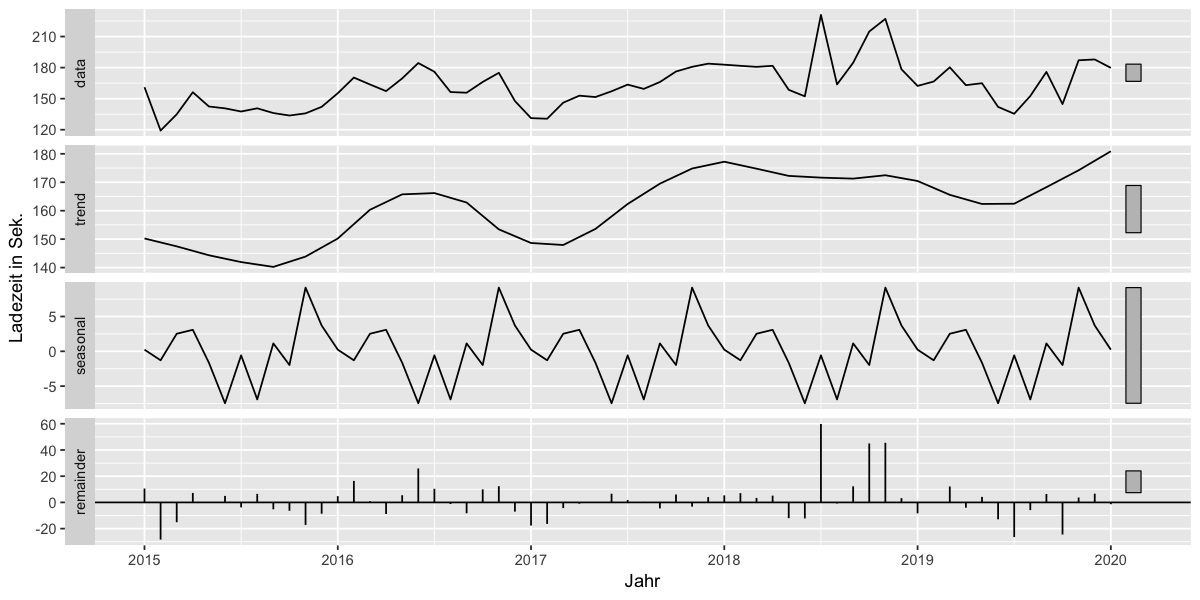

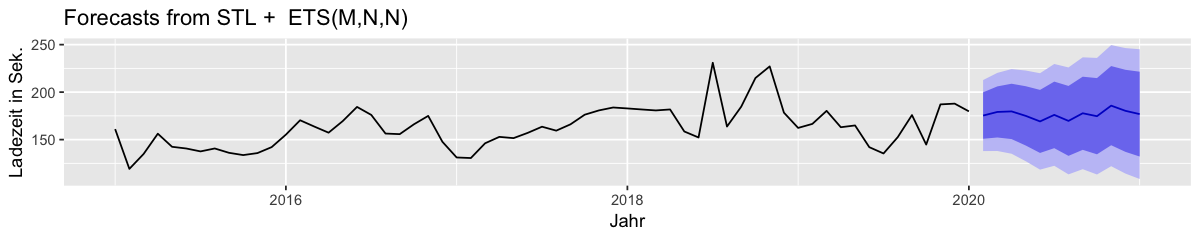

In [57]:
options(repr.plot.width=10, repr.plot.height=5)
stl(y, t.window=12, s.window="periodic", robust=TRUE) %>% autoplot() + xlab("Jahr") + ylab("Ladezeit in Sek.")
options(repr.plot.width=10, repr.plot.height=2)
c %>% forecast(h=12) %>% autoplot() + xlab("Jahr") + ylab("Ladezeit in Sek.")

#### 8.6.1 Fazit Forecast STL:
- Die Saison Trend Zerlegung von Loess zeigt einen anderen Trend als die ARIMA & ETS Funktion. Der Trend ist **Wellenförmig und zeigt leicht nach oben**. <br>Für das **Jahr 2020** wird auch eine Wellenförmige und **leicht Ansteigende Tendenz vorhergesagt**. Die Konfidenzbänder zeigen auch eine leichten Anstieg der Ladezeiten.